In [824]:
# Load all required libraries in the very first lines of your code.

# Lev
import pandas as pd
from datetime import date
import os
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
import traceback
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.ensemble import RandomForestRegressor  
from sklearn.ensemble import GradientBoostingRegressor 
import statsmodels.api as sm
from scipy import stats

# Harsh
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller

# Soham
# Libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Libraries for econometric models
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg

# Libraries for machine learning models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Libraries for statistical tests
from statsmodels.tsa.stattools import acf
from scipy.stats import t

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to handle warnings
import warnings
warnings.filterwarnings("ignore")

# Pratiksha
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from scipy.stats import t 

In [826]:
## Lev Start

In [828]:
## get wd

print("Current Working Directory:", os.getcwd())

Current Working Directory: C:\Users\Acer\Desktop\DAI


In [830]:
## set wd to DAI
os.chdir("C:\\Users\\Acer\\Desktop\\DAI")

In [832]:
## read daily data

# Read the CSV file
Daily_total = pd.read_csv('daily.csv')

Daily_total


,gvkey,iid,datadate,tic,prccd
0,1690,01,2023-08-01,AAPL,195.605
1,1690,01,2023-08-02,AAPL,192.580
2,1690,01,2023-08-03,AAPL,191.170
3,1690,01,2023-08-04,AAPL,181.990
4,1690,01,2023-08-07,AAPL,178.850
...,...,...,...,...,...
1319,12141,01,2024-08-12,MSFT,406.810
1320,12141,01,2024-08-13,MSFT,414.010
1321,12141,01,2024-08-14,MSFT,416.860
1322,12141,01,2024-08-15,MSFT,421.030


In [834]:
# info on my df
Daily_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gvkey     1324 non-null   int64  
 1   iid       1324 non-null   object 
 2   datadate  1324 non-null   object 
 3   tic       1324 non-null   object 
 4   prccd     1320 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 51.8+ KB


In [836]:
# convert datadate to datetime type
Daily_total["datadate"] = pd.to_datetime(Daily_total["datadate"])

Daily_total["datadate"]

#  Sort the DataFrame by 'tic' and 'datadate'
Daily_total = Daily_total.sort_values(by=['tic', 'datadate'])


In [838]:
## invesitgating NAs
Daily_total.isna()
Daily_total.isna().sum()


rows_with_nas = Daily_total[Daily_total.isna().any(axis=1)]
print(rows_with_nas)


### result: there is 4 NaN with GMM.U instead GM
### for each day, there is a Price for GMM.U there is a price for GM
### hence GMM.U must be soome kind of error
### Solution: Ill drop GMM.U


# Filter rows where the 'datadate' is '2023-08-31'
filtered_rows = Daily_total[Daily_total['datadate'] == '2023-08-31']
print(filtered_rows)


Daily_total = Daily_total[Daily_total['tic'] != 'GMM.U']



     gvkey  iid   datadate    tic  prccd
792   5073  19C 2023-08-31  GMM.U    NaN
793   5073  19C 2023-11-30  GMM.U    NaN
794   5073  19C 2024-02-29  GMM.U    NaN
795   5073  19C 2024-06-07  GMM.U    NaN
      gvkey  iid   datadate    tic   prccd
22     1690   01 2023-08-31   AAPL  187.87
286    4839   01 2023-08-31      F   12.13
550    5073   19 2023-08-31     GM   33.51
792    5073  19C 2023-08-31  GMM.U     NaN
818    6066   01 2023-08-31    IBM  146.83
1082  12141   01 2023-08-31   MSFT  327.76


In [840]:
Daily_total.isna()
Daily_total.isna().sum()

## No Nas left

name_counts = Daily_total.groupby('tic').size()

# Print the result
print(name_counts)


tic
AAPL    264
F       264
GM      264
IBM     264
MSFT    264
dtype: int64


In [842]:
## compute retuns, making sure that its done over the different names in tic

Daily_total = Daily_total.sort_values(by=['tic', 'datadate'])

Daily_total['return'] = Daily_total.groupby('tic')['prccd'].pct_change()

print(Daily_total[Daily_total['datadate'] == '2023-08-01'])

## there is one NaN left for each company: the first day of observation (2023-08-01),
## because i cant compute a return for it

Daily_total = Daily_total.dropna()

print(Daily_total.isna().sum())



      gvkey iid   datadate   tic    prccd  return
0      1690  01 2023-08-01  AAPL  195.605     NaN
264    4839  01 2023-08-01     F   13.420     NaN
528    5073  19 2023-08-01    GM   38.120     NaN
796    6066  01 2023-08-01   IBM  143.330     NaN
1060  12141  01 2023-08-01  MSFT  336.340     NaN
gvkey       0
iid         0
datadate    0
tic         0
prccd       0
return      0
dtype: int64


In [844]:
Daily_total

,gvkey,iid,datadate,tic,prccd,return
1,1690,01,2023-08-02,AAPL,192.58,-0.015465
2,1690,01,2023-08-03,AAPL,191.17,-0.007322
3,1690,01,2023-08-04,AAPL,181.99,-0.048020
4,1690,01,2023-08-07,AAPL,178.85,-0.017254
5,1690,01,2023-08-08,AAPL,179.80,0.005312
...,...,...,...,...,...,...
1319,12141,01,2024-08-12,MSFT,406.81,0.001946
1320,12141,01,2024-08-13,MSFT,414.01,0.017699
1321,12141,01,2024-08-14,MSFT,416.86,0.006884
1322,12141,01,2024-08-15,MSFT,421.03,0.010003


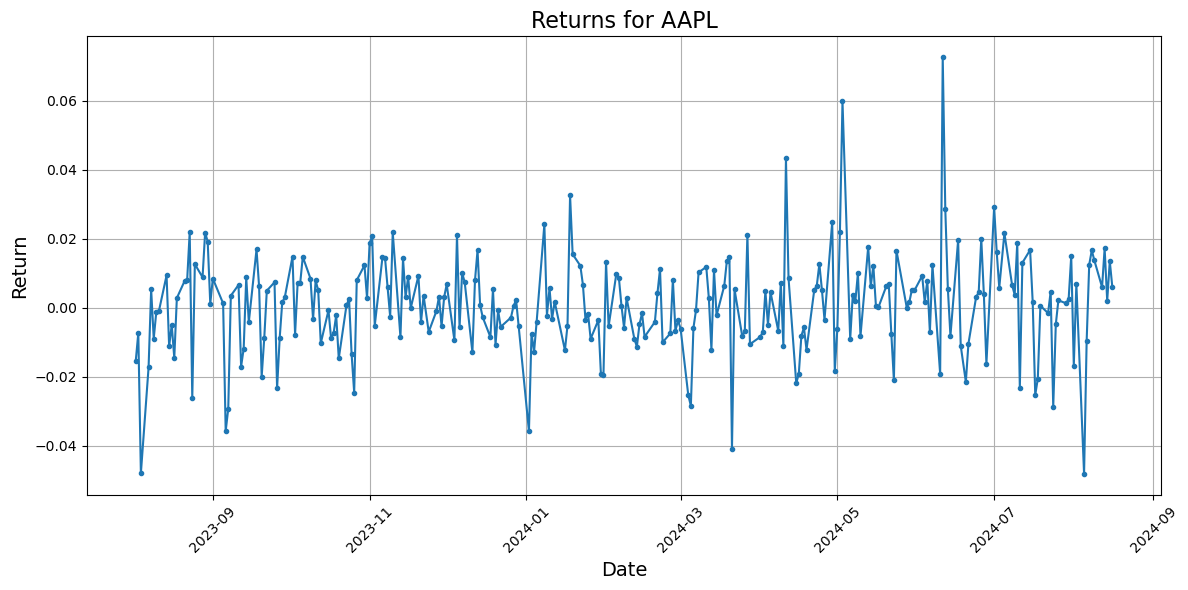

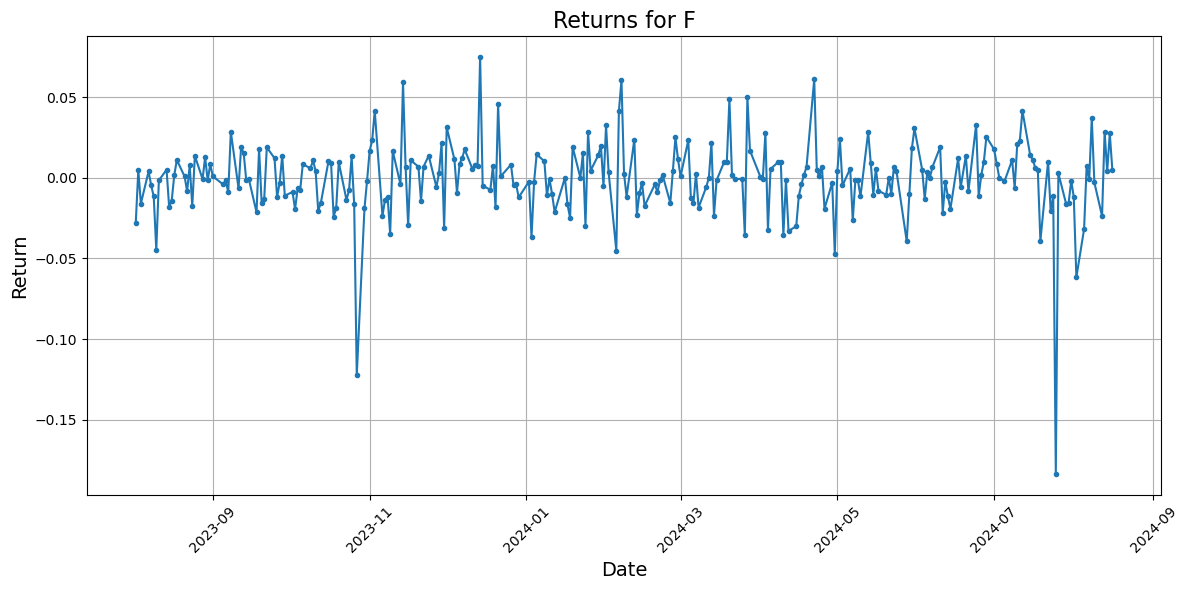

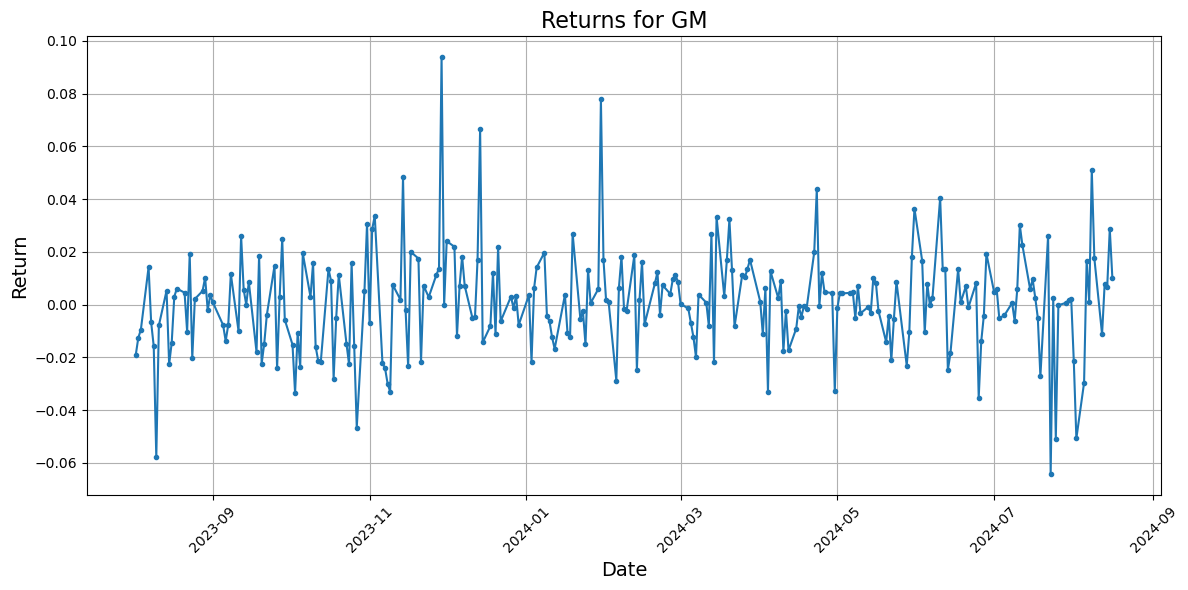

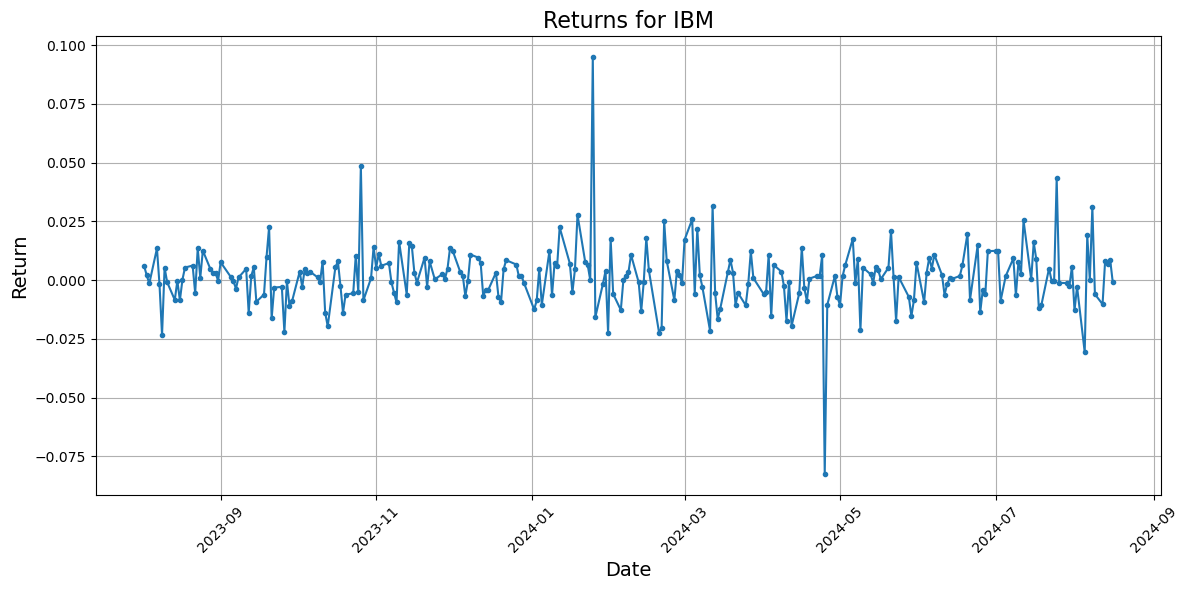

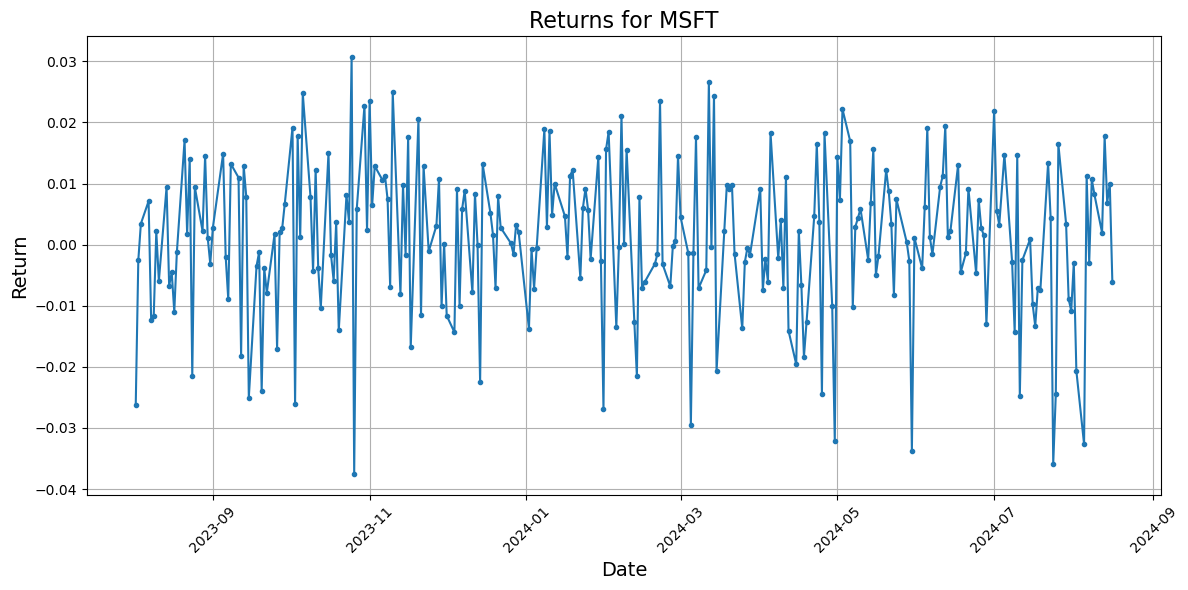

In [846]:
# plot of the reutns

for company in Daily_total['tic'].unique():
    
    company_data = Daily_total[Daily_total['tic'] == company].copy()
    
    plt.figure(figsize=(12, 6))
    plt.plot(company_data['datadate'], company_data['return'], marker='o', linestyle='-', markersize=3)
    plt.title(f'Returns for {company}', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Return', fontsize=14)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.show()

## i can not visually identify a seasonal structure in the time series of the returns, hence i will proceed without a seasonal adjustment 

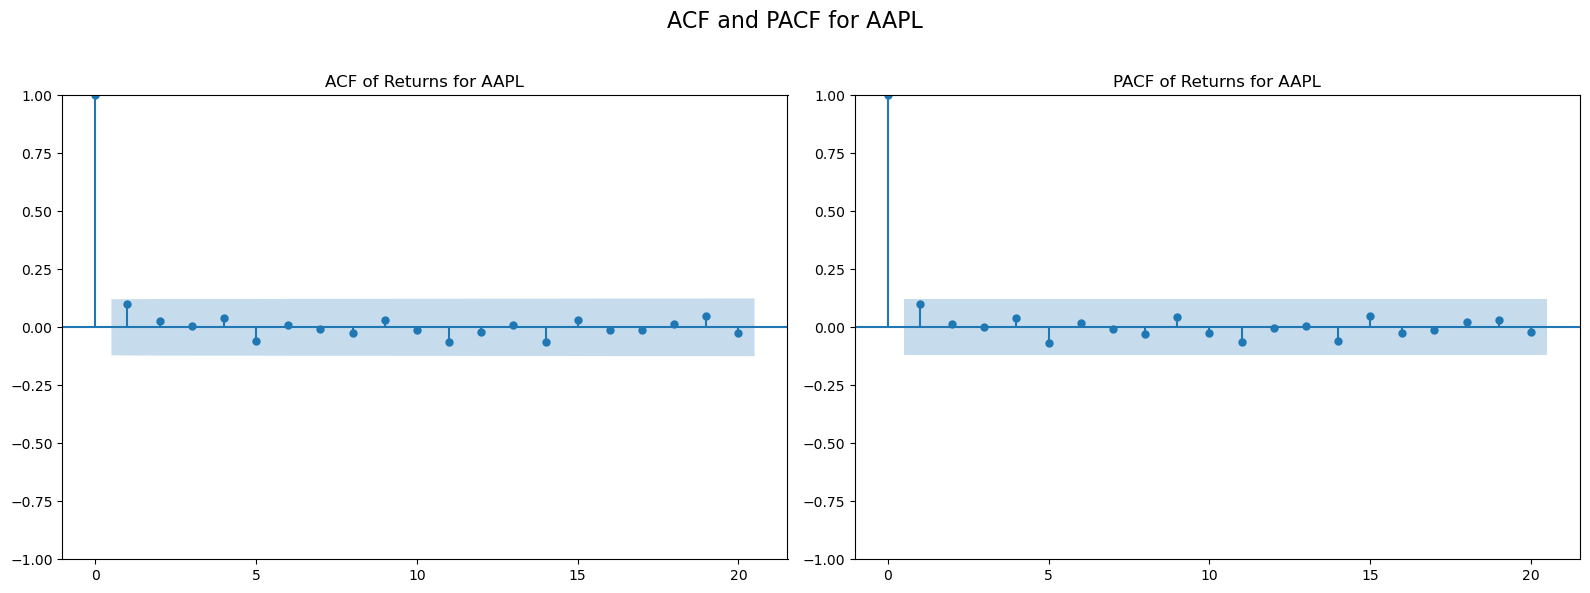

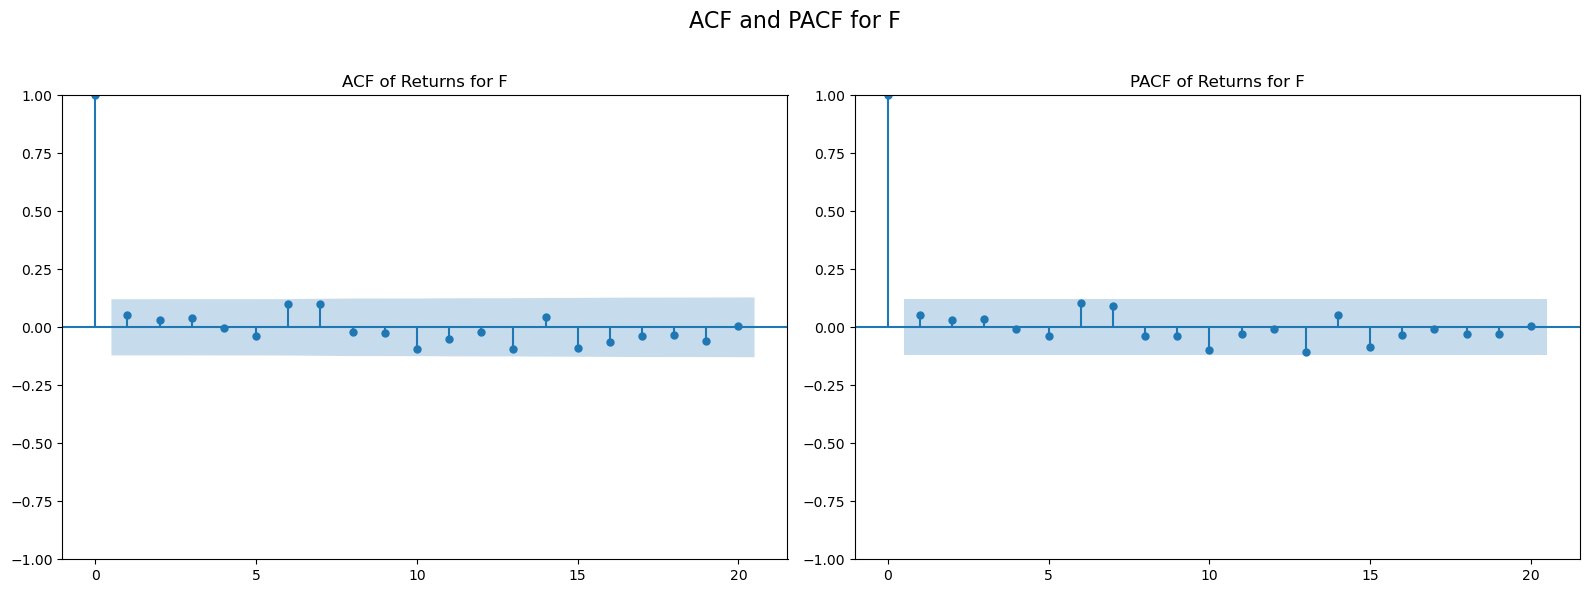

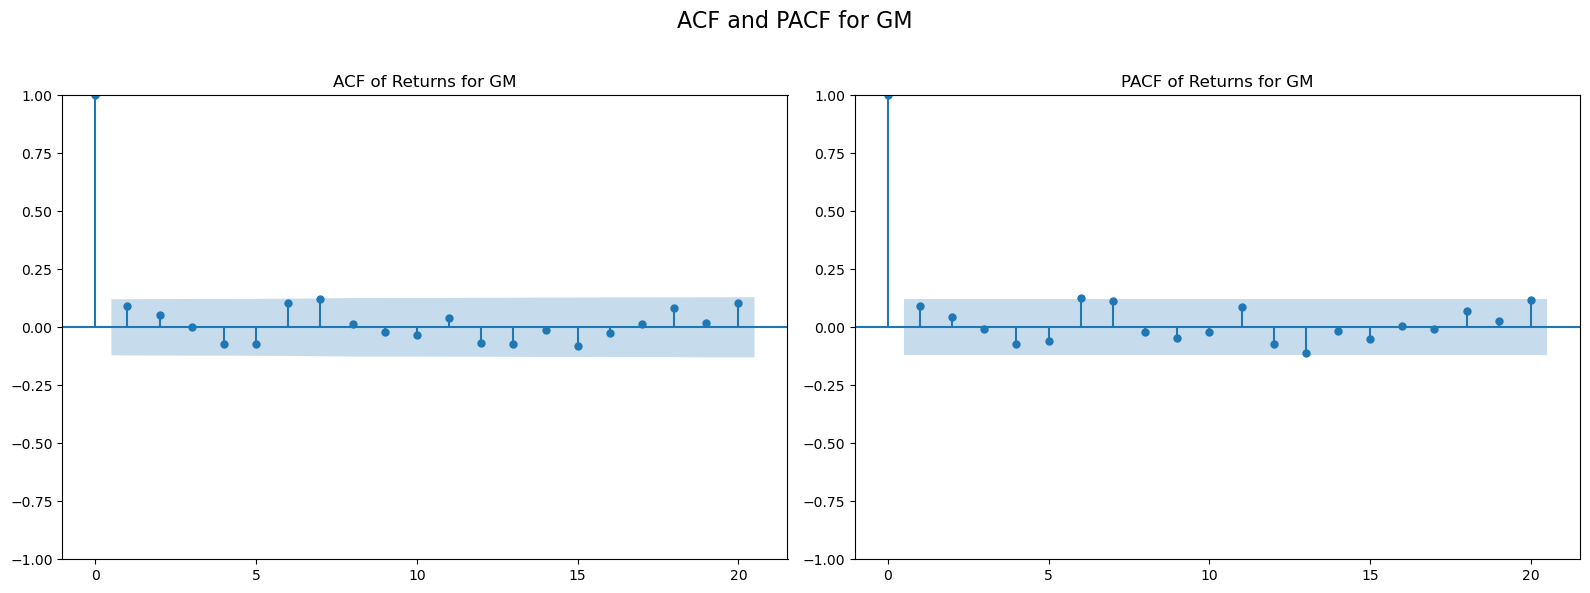

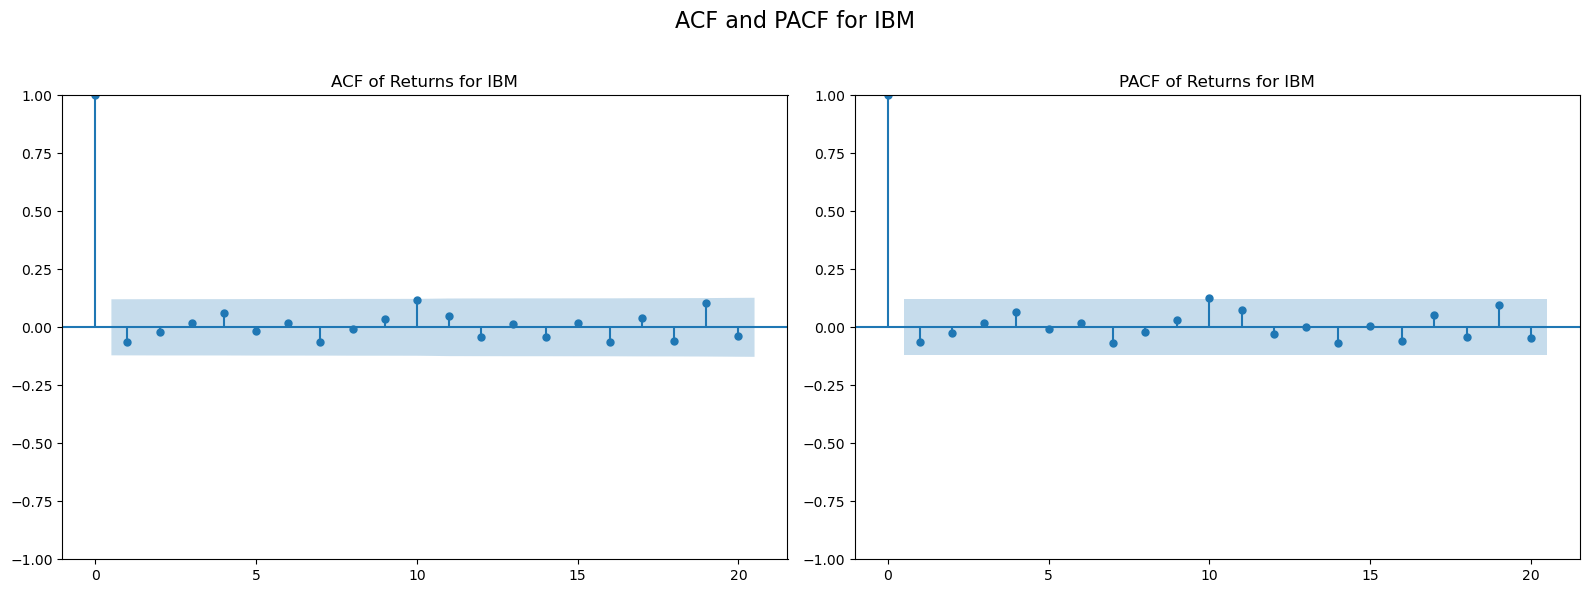

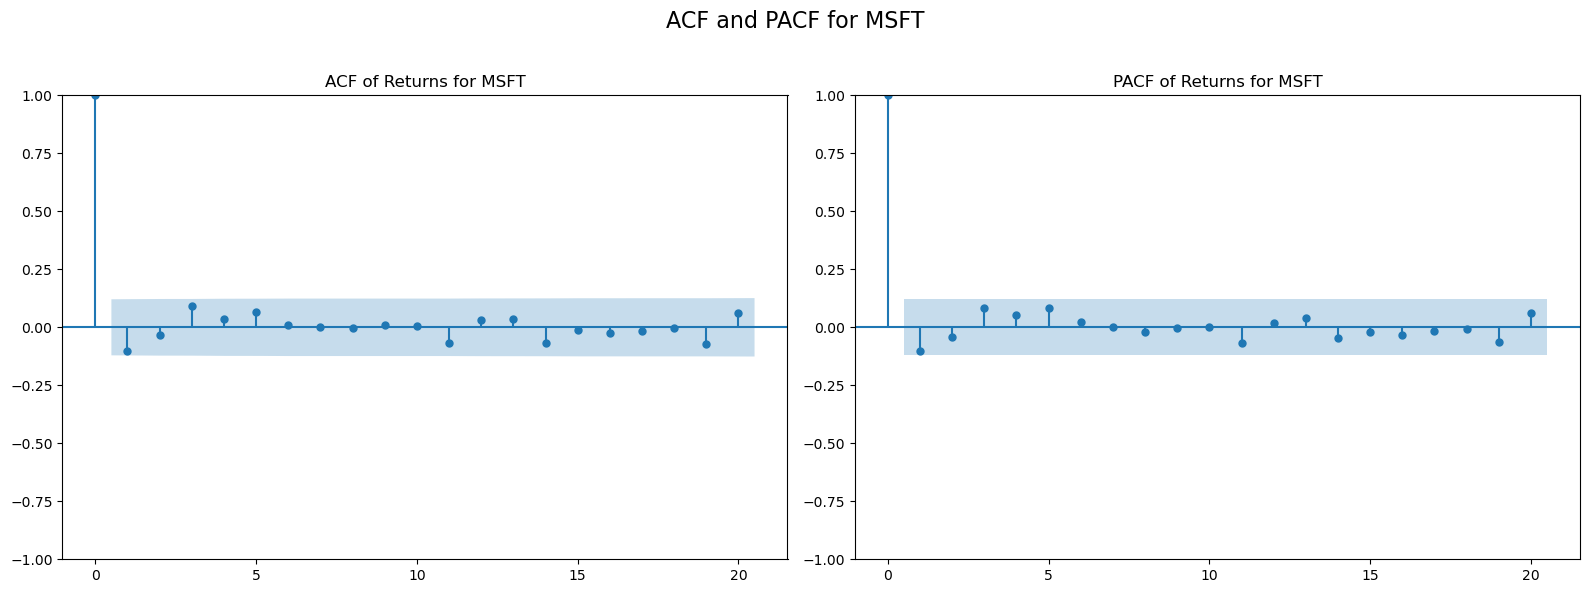

In [847]:
#  ACF and PACF of returns for all companies individually



for company in Daily_total['tic'].unique():
    
    company_data = Daily_total[Daily_total['tic'] == company].copy()
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'ACF and PACF for {company}', fontsize=16)
    
    plot_acf(company_data['return'], ax=axes[0], lags=20)
    axes[0].set_title(f'ACF of Returns for {company}')
    
    plot_pacf(company_data['return'], ax=axes[1], lags=20)
    axes[1].set_title(f'PACF of Returns for {company}')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


In [848]:
# Visula analysis of the plots:
# Info: if lags fall outside the blue are, the correlation is statistically significant

# AAPL: ACF: no lag seems to be significant, ill take the first two ; PACF: no lag seems to be significant, ill take the first two
# F: ACF: no lag seems to be significant, ill take the first two ; PACF: lag 12
# GM: ACF: lag  7; PACF: lag 6,7, 13, 20
# IBM: ACF lag 10 ; PACF: lag 10 
# MSFT: ACF:  no lag seems to be significant, ill take the first two; PACF: no lag seems to be significant, ill take the first two

# Note: the lags that do seem to be significant (GM and IBM) fall only a little bit out of the significance bounds
# a higher significance level might result in insignificant lags for all companies


In [849]:
# Moving averages

# AAPL: MA(2)
# F: MA(2)
# GM: MA(7)
# IBM: MA(10)
# MSFT: MA(2)
# the q in MA(q) stems from the ACF. If lag X is significant, all lags up to and including lag X are incorporated into the model
# If no lag was significant, only the first 2 lags are used


# Forecast start and end date for the rolling window
forecast_start_date = pd.to_datetime('2024-08-01')
forecast_end_date = pd.to_datetime('2024-08-14')

# Lags for each company 
company_lags = {'AAPL': 2, 'F': 2, 'GM': 7, 'IBM': 10, 'MSFT': 2}

# DataFrame to store the results
results_MA = []

# Iterate over each company
for company in Daily_total['tic'].unique():
    
    # Filter data for the current company
    company_data = Daily_total[Daily_total['tic'] == company].copy()
    company_data = company_data.sort_values(by='datadate')
    
    # Get the lag for the current company from the company_lags dictionary
    lag = company_lags[company]
    
    # Loop through each forecast date from 01.08.2024 to 14.08.2024
    current_date = forecast_start_date
    while current_date <= forecast_end_date:
        
        # Definition of the rolling window (1 year of data for daily data)
        train_start_date = current_date - pd.DateOffset(years=1)
        train_end_date = current_date - pd.DateOffset(days=1)
        
        # Filter the training data (1 year before the forecast date)
        train_data = company_data[(company_data['datadate'] >= train_start_date) & (company_data['datadate'] <= train_end_date)].copy()
        
        # Check if there's enough data for training
        if len(train_data) >= lag:  # Ensure there is enough data for the given lag
            # Compute the Moving Average for the specified lag
            train_data['MA'] = train_data['return'].rolling(window=lag).mean()
            
            # Get the most recent Moving Average value 
            last_ma_value = train_data['MA'].iloc[-1]
            
            # If the Moving Average is not NaN (i.e., there was enough data to compute it), proceed
            if not pd.isna(last_ma_value):
                # Forecast for the next day is the last available MA value
                forecast = last_ma_value
                
                # Append the current result to the results list
                results_MA.append({'tic': company, 'datadate': current_date, 'forecast': forecast})
        
        # Move to the next forecast date
        current_date += pd.DateOffset(days=1)

# Convert the results list to a DataFrame
results_MA = pd.DataFrame(results_MA)

# Print the forecast results
print(results_MA)

     tic   datadate  forecast
0   AAPL 2024-08-01  0.008778
1   AAPL 2024-08-02 -0.000880
2   AAPL 2024-08-03 -0.004941
3   AAPL 2024-08-04 -0.004941
4   AAPL 2024-08-05 -0.004941
..   ...        ...       ...
65  MSFT 2024-08-10  0.009481
66  MSFT 2024-08-11  0.009481
67  MSFT 2024-08-12  0.009481
68  MSFT 2024-08-13  0.005108
69  MSFT 2024-08-14  0.009822

[70 rows x 3 columns]


In [850]:
# dropping weekend values 
results_MA = results_MA[~results_MA['datadate'].dt.weekday.isin([5, 6])]


In [851]:
# AR with intercept 
# the p in AR(p) stems from the visual Analysis of the PACF
# If lag X is significant, all lags up to and including lag X are incorporated into the model
# If no lag was significant, only the first 2 lags are used

# AAPL: AR(2)
# F: AR(12)
# GM: AR(20)
# IBM: AR(10)
# MSFT: AR(2)



# Forecast start and end date for the rolling window
forecast_start_date = pd.to_datetime('2024-08-01')
forecast_end_date = pd.to_datetime('2024-08-14')

# Lags for each company
company_lags = {'AAPL': 2, 'F': 12, 'GM': 20, 'IBM': 10, 'MSFT': 2}

# DataFrame to store the results
results_AR = []

# Iterate over each company
for company in Daily_total['tic'].unique():
    
    # Filter data for the current company
    company_data = Daily_total[Daily_total['tic'] == company].copy()
    company_data['datadate'] = pd.to_datetime(company_data['datadate'])  # Ensure datadate is datetime
    company_data.set_index('datadate', inplace=True)
    company_data = company_data.sort_index()
    
    # Ensure the index has daily frequency
    company_data = company_data.asfreq('D', fill_value=None)
    
    # Get the lag for the current company from the company_lags dictionary
    ar_lag = company_lags[company]
    
    # Loop through each forecast date from 01.08.2024 to 14.08.2024
    current_date = forecast_start_date
    while current_date <= forecast_end_date:
        
        # Definition of the rolling window (1 year of data for daily data)
        train_start_date = current_date - pd.DateOffset(years=1)
        train_end_date = current_date - pd.DateOffset(days=1)
        
        # Filter the training data (1 year before the forecast date)
        train_data = company_data[(company_data.index >= train_start_date) & (company_data.index <= train_end_date)].copy()
        
        # Check if there's enough data for training
        if len(train_data) > ar_lag:  # Ensure there is enough data for the given lag
            
            # Drop rows with NaNs or Infs in 'return'
            train_data = train_data.dropna(subset=['return'])
            train_data = train_data[~train_data['return'].isin([float('inf'), -float('inf')])]
            
            # Ensure the training data is still valid
            if len(train_data) > ar_lag:  # Ensure there is enough data for the given lag
                try:
                    # Fit the AutoReg model
                    model = AutoReg(train_data['return'], lags=ar_lag, trend='c')
                    model_fitted = model.fit()
                    
                    # Forecast for the next day
                    forecast_index = len(train_data)  # Use the length of the train_data to forecast the next step
                    forecast = model_fitted.predict(start=forecast_index, end=forecast_index, dynamic=False)
                    
                    # If the forecast is not empty, append the result
                    if not forecast.empty:
                        forecast_value = forecast.iloc[0]
                        results_AR.append({'tic': company, 'datadate': current_date, 'forecast': forecast_value})
                
                except Exception as e:
                    print(f"Error fitting model for company {company} on {current_date}: {e}")
        
        # Move to the next forecast date
        current_date += pd.DateOffset(days=1)

# Convert the results list to a DataFrame
results_AR = pd.DataFrame(results_AR)

# Print the forecast results
print(results_AR)

     tic   datadate  forecast
0   AAPL 2024-08-01  0.002145
1   AAPL 2024-08-02 -0.000990
2   AAPL 2024-08-03  0.001569
3   AAPL 2024-08-04  0.001558
4   AAPL 2024-08-05  0.001458
..   ...        ...       ...
65  MSFT 2024-08-10 -0.000337
66  MSFT 2024-08-11 -0.000359
67  MSFT 2024-08-12 -0.000331
68  MSFT 2024-08-13  0.000538
69  MSFT 2024-08-14 -0.000865

[70 rows x 3 columns]


In [853]:
# dropping weekend values 
results_AR = results_AR[~results_AR['datadate'].dt.weekday.isin([5, 6])]


In [854]:
# ARMA(p,q) Modelling with intercept
# q from MA(q) modelling
# p from AR(p) modelling


# AAPL: ARMA(2,2)
# F: ARMA(12,2)
# GM: ARMA(20,7)
# IBM: ARMA(10,10)
# MSFT ARMA(2,2)


# Forecast start and end date for the rolling window
forecast_start_date = pd.to_datetime('2024-08-01')
forecast_end_date = pd.to_datetime('2024-08-14')

# ARMA orders for each company
company_arma_orders = {'AAPL': (2, 2), 'F': (12, 2), 'GM': (20, 7), 'IBM': (10, 10), 'MSFT': (2, 2)}

# DataFrame to store the results
results_ARMA = []

# Iterate over each company
for company in Daily_total['tic'].unique():
    
    # Filter data for the current company
    company_data = Daily_total[Daily_total['tic'] == company].copy()
    company_data = company_data.sort_values(by='datadate')
    
    # Get the ARMA orders for the current company from the company_arma_orders dictionary
    p, q = company_arma_orders[company]
    
    # Loop through each forecast date from 01.08.2024 to 14.08.2024
    current_date = forecast_start_date
    while current_date <= forecast_end_date:
        
        # Definition of the rolling window (1 year of data for daily data)
        train_start_date = current_date - pd.DateOffset(years=1)
        train_end_date = current_date - pd.DateOffset(days=1)
        
        # Filter the training data (1 year before the forecast date)
        train_data = company_data[(company_data['datadate'] >= train_start_date) & (company_data['datadate'] <= train_end_date)].copy()
        
        # Reset index
        train_data = train_data.reset_index(drop=True)
        
        # Check if there's enough data for training
        if len(train_data) > max(p, q):  # Ensure there is enough data for the given lags
            # Ensure there are no NaNs in 'return'
            train_data = train_data.dropna(subset=['return'])
            
            try:
                # Fit the ARMA model (ARIMA with d=0)
                model = ARIMA(train_data['return'], order=(p, 0, q), trend='c')
                model_fitted = model.fit()  # Removed disp=False
                
                # Forecast for the next day
                forecast = model_fitted.forecast(steps=1).iloc[0]
                
                # Append the current result to the results list
                results_ARMA.append({'tic': company, 'datadate': current_date, 'forecast': forecast})
            
            except Exception as e:
                print(f"Error fitting ARMA model for company {company} on {current_date}: {e}")
                traceback.print_exc()
        
        # Move to the next forecast date
        current_date += pd.DateOffset(days=1)

# Convert the results list to a DataFrame
results_ARMA = pd.DataFrame(results_ARMA)

# Print the forecast results
print(results_ARMA)


     tic   datadate  forecast
0   AAPL 2024-08-01  0.001867
1   AAPL 2024-08-02 -0.000236
2   AAPL 2024-08-03  0.001420
3   AAPL 2024-08-04  0.001371
4   AAPL 2024-08-05  0.001340
..   ...        ...       ...
65  MSFT 2024-08-10 -0.000127
66  MSFT 2024-08-11  0.000727
67  MSFT 2024-08-12 -0.000080
68  MSFT 2024-08-13  0.000922
69  MSFT 2024-08-14 -0.000615

[70 rows x 3 columns]


In [855]:
# dropping weekend values 
results_ARMA = results_ARMA[~results_ARMA['datadate'].dt.weekday.isin([5, 6])]


In [856]:
# regression trees

# order of lags to include corresponds to the highest significant lag
# identified by examining the PACF of each companies return series

# AAPL: 2
# F: 12
# GM: 20
# IBM: 10
# MSFT: 2




# Forecast start and end date for the rolling window
forecast_start_date = pd.to_datetime('2024-08-01')
forecast_end_date = pd.to_datetime('2024-08-14')

# Lags for each company 
company_lags = {'AAPL': 2, 'F': 12, 'GM': 20, 'IBM': 10, 'MSFT': 2}

# DataFrame to store the results
results_tree = []

# Iterate over each company
for company in Daily_total['tic'].unique():
    
    # Filter data for the current company
    company_data = Daily_total[Daily_total['tic'] == company].copy()
    company_data = company_data.sort_values(by='datadate')
    
    # Get the lag for the current company from the company_lags dictionary
    lag = company_lags[company]
    
    # Create lagged features for the target variable (return)
    for i in range(1, lag+1):
        company_data[f'lag_{i}'] = company_data['return'].shift(i)
    
    # Drop any rows with missing lag values (due to the shift)
    company_data = company_data.dropna(subset=[f'lag_{i}' for i in range(1, lag+1)])
    
    # Loop through each forecast date from 01.08.2024 to 14.08.2024
    current_date = forecast_start_date
    while current_date <= forecast_end_date:
        
        # Definition of the rolling window (1 year of data for daily data)
        train_start_date = current_date - pd.DateOffset(years=1)
        train_end_date = current_date - pd.DateOffset(days=1)
        
        # Filter the training data (1 year before the forecast date)
        train_data = company_data[(company_data['datadate'] >= train_start_date) & (company_data['datadate'] <= train_end_date)].copy()
        
        # Check if there's enough data for training
        if len(train_data) >= lag:  # Ensure there is enough data for the given lag
            
            # Define the feature columns (the lagged return values) and target column
            X_train = train_data[[f'lag_{i}' for i in range(1, lag+1)]]
            y_train = train_data['return']
            
            # Train a DecisionTreeRegressor
            model = DecisionTreeRegressor()
            model.fit(X_train, y_train)
            
            # Get the most recent lag values (i.e., for the last available date in the training period)
            last_lags = train_data[[f'lag_{i}' for i in range(1, lag+1)]].iloc[-1].values
            
            # Create DataFrame for last lag values with proper feature names
            last_lags_df = pd.DataFrame([last_lags], columns=[f'lag_{i}' for i in range(1, lag+1)]) 
            
            # Use the model to forecast the next day's return
            forecast = model.predict(last_lags_df)[0]
            
            # Append the current result to the results list
            results_tree.append({'tic': company, 'datadate': current_date, 'forecast': forecast})
        
        # Move to the next forecast date
        current_date += pd.DateOffset(days=1)

# Convert the results list to a DataFrame
results_tree = pd.DataFrame(results_tree)

# Print the forecast results
print(results_tree)

     tic   datadate  forecast
0   AAPL 2024-08-01  0.014991
1   AAPL 2024-08-02 -0.016751
2   AAPL 2024-08-03  0.006869
3   AAPL 2024-08-04  0.006869
4   AAPL 2024-08-05  0.006869
..   ...        ...       ...
65  MSFT 2024-08-10  0.008269
66  MSFT 2024-08-11  0.008269
67  MSFT 2024-08-12  0.008269
68  MSFT 2024-08-13  0.001946
69  MSFT 2024-08-14  0.017699

[70 rows x 3 columns]


In [857]:
# dropping weekend values 
results_tree = results_tree[~results_tree['datadate'].dt.weekday.isin([5, 6])]

In [858]:
# random forests



# Forecast start and end date for the rolling window
forecast_start_date = pd.to_datetime('2024-08-01')
forecast_end_date = pd.to_datetime('2024-08-14')

# Lags for each company 
company_lags = {'AAPL': 2, 'F': 12, 'GM': 20, 'IBM': 10, 'MSFT': 2}

# DataFrame to store the results
results_forest = []

# Iterate over each company
for company in Daily_total['tic'].unique():
    
    # Filter data for the current company
    company_data = Daily_total[Daily_total['tic'] == company].copy()
    company_data = company_data.sort_values(by='datadate')
    
    # Get the lag for the current company from the company_lags dictionary
    lag = company_lags[company]
    
    # Create lagged features for the target variable (return)
    for i in range(1, lag+1):
        company_data[f'lag_{i}'] = company_data['return'].shift(i)
    
    # Drop any rows with missing lag values (due to the shift)
    company_data = company_data.dropna(subset=[f'lag_{i}' for i in range(1, lag+1)])
    
    # Loop through each forecast date from 01.08.2024 to 14.08.2024
    current_date = forecast_start_date
    while current_date <= forecast_end_date:
        
        # Definition of the rolling window (1 year of data for daily data)
        train_start_date = current_date - pd.DateOffset(years=1)
        train_end_date = current_date - pd.DateOffset(days=1)
        
        # Filter the training data (1 year before the forecast date)
        train_data = company_data[(company_data['datadate'] >= train_start_date) & (company_data['datadate'] <= train_end_date)].copy()
        
        # Check if there's enough data for training
        if len(train_data) >= lag:  # Ensure there is enough data for the given lag
            
            # Define the feature columns (the lagged return values) and target column
            X_train = train_data[[f'lag_{i}' for i in range(1, lag+1)]]
            y_train = train_data['return']
            
            # Train a RandomForestRegressor
            model = RandomForestRegressor()  
            model.fit(X_train, y_train)
            
            # Get the most recent lag values (i.e., for the last available date in the training period)
            last_lags = train_data[[f'lag_{i}' for i in range(1, lag+1)]].iloc[-1].values
            
            # Create DataFrame for last lag values with proper feature names
            last_lags_df = pd.DataFrame([last_lags], columns=[f'lag_{i}' for i in range(1, lag+1)]) 
            
            # Use the model to forecast the next day's return
            forecast = model.predict(last_lags_df)[0]
            
            # Append the current result to the results list
            results_forest.append({'tic': company, 'datadate': current_date, 'forecast': forecast})
        
        # Move to the next forecast date
        current_date += pd.DateOffset(days=1)

# Convert the results list to a DataFrame
results_forest = pd.DataFrame(results_forest)

# Print the forecast results
print(results_forest)


     tic   datadate  forecast
0   AAPL 2024-08-01  0.009044
1   AAPL 2024-08-02 -0.011467
2   AAPL 2024-08-03  0.005712
3   AAPL 2024-08-04  0.010295
4   AAPL 2024-08-05  0.005610
..   ...        ...       ...
65  MSFT 2024-08-10  0.006803
66  MSFT 2024-08-11  0.004798
67  MSFT 2024-08-12  0.005213
68  MSFT 2024-08-13  0.001845
69  MSFT 2024-08-14  0.007416

[70 rows x 3 columns]


In [860]:
# dropping weekend values 
results_forest = results_forest[~results_forest['datadate'].dt.weekday.isin([5, 6])]

In [864]:
# gradient boosting 


# Forecast start and end date for the rolling window
forecast_start_date = pd.to_datetime('2024-08-01')
forecast_end_date = pd.to_datetime('2024-08-14')

# Lags for each company 
company_lags = {'AAPL': 2, 'F': 12, 'GM': 20, 'IBM': 10, 'MSFT': 2}

# DataFrame to store the results
results_gbm = []

# Iterate over each company
for company in Daily_total['tic'].unique():
    
    # Filter data for the current company
    company_data = Daily_total[Daily_total['tic'] == company].copy()
    company_data = company_data.sort_values(by='datadate')
    
    # Get the lag for the current company from the company_lags dictionary
    lag = company_lags[company]
    
    # Create lagged features for the target variable (return)
    for i in range(1, lag+1):
        company_data[f'lag_{i}'] = company_data['return'].shift(i)
    
    # Drop any rows with missing lag values (due to the shift)
    company_data = company_data.dropna(subset=[f'lag_{i}' for i in range(1, lag+1)])
    
    # Loop through each forecast date from 01.08.2024 to 14.08.2024
    current_date = forecast_start_date
    while current_date <= forecast_end_date:
        
        # Definition of the rolling window (1 year of data for daily data)
        train_start_date = current_date - pd.DateOffset(years=1)
        train_end_date = current_date - pd.DateOffset(days=1)
        
        # Filter the training data (1 year before the forecast date)
        train_data = company_data[(company_data['datadate'] >= train_start_date) & (company_data['datadate'] <= train_end_date)].copy()
        
        # Check if there's enough data for training
        if len(train_data) >= lag:  # Ensure there is enough data for the given lag
            
            # Define the feature columns (the lagged return values) and target column
            X_train = train_data[[f'lag_{i}' for i in range(1, lag+1)]]
            y_train = train_data['return']
            
            # Train a GradientBoostingRegressor
            model = GradientBoostingRegressor()  
            model.fit(X_train, y_train)
            
            # Get the most recent lag values (i.e., for the last available date in the training period)
            last_lags = train_data[[f'lag_{i}' for i in range(1, lag+1)]].iloc[-1].values
            
            # Create DataFrame for last lag values with proper feature names
            last_lags_df = pd.DataFrame([last_lags], columns=[f'lag_{i}' for i in range(1, lag+1)]) 
            
            # Use the model to forecast the next day's return
            forecast = model.predict(last_lags_df)[0]
            
            # Append the current result to the results list
            results_gbm.append({'tic': company, 'datadate': current_date, 'forecast': forecast})
        
        # Move to the next forecast date
        current_date += pd.DateOffset(days=1)

# Convert the results list to a DataFrame
results_gbm = pd.DataFrame(results_gbm)

# Print the forecast results
print(results_gbm)

     tic   datadate  forecast
0   AAPL 2024-08-01 -0.001004
1   AAPL 2024-08-02 -0.012221
2   AAPL 2024-08-03  0.005777
3   AAPL 2024-08-04  0.005777
4   AAPL 2024-08-05  0.005044
..   ...        ...       ...
65  MSFT 2024-08-10  0.002381
66  MSFT 2024-08-11  0.001808
67  MSFT 2024-08-12  0.001690
68  MSFT 2024-08-13  0.004098
69  MSFT 2024-08-14  0.007660

[70 rows x 3 columns]


In [865]:
# dropping weekend values 
results_gbm = results_gbm[~results_gbm['datadate'].dt.weekday.isin([5, 6])]

In [868]:
# RMSE preparation real values

Real_Values = Daily_total[(Daily_total["datadate"] >= pd.to_datetime('2024-08-01')) & (Daily_total["datadate"] <= pd.to_datetime('2024-08-14'))]
Real_Values

Real_Values_AAPL = Real_Values[Real_Values["tic"] == "AAPL"]
Real_Values_AAPL

Real_Values_F = Real_Values[Real_Values["tic"] == "F"]
Real_Values_F

Real_Values_GM = Real_Values[Real_Values["tic"] == "GM"]
Real_Values_GM

Real_Values_IBM = Real_Values[Real_Values["tic"] == "IBM"]
Real_Values_IBM

Real_Values_MSFT = Real_Values[Real_Values["tic"] == "MSFT"]
Real_Values_MSFT


,gvkey,iid,datadate,tic,prccd,return
1312,12141,01,2024-08-01,MSFT,417.11,-0.002964
1313,12141,01,2024-08-02,MSFT,408.49,-0.020666
1314,12141,01,2024-08-05,MSFT,395.15,-0.032657
1315,12141,01,2024-08-06,MSFT,399.61,0.011287
1316,12141,01,2024-08-07,MSFT,398.43,-0.002953
1317,12141,01,2024-08-08,MSFT,402.69,0.010692
1318,12141,01,2024-08-09,MSFT,406.02,0.008269
1319,12141,01,2024-08-12,MSFT,406.81,0.001946
1320,12141,01,2024-08-13,MSFT,414.01,0.017699
1321,12141,01,2024-08-14,MSFT,416.86,0.006884


In [869]:
# rmse preparation MA

results_MA_AAPL =  results_MA[results_MA["tic"] == "AAPL"]
results_MA_AAPL

results_MA_F =  results_MA[results_MA["tic"] == "F"]
results_MA_F

results_MA_GM =  results_MA[results_MA["tic"] == "GM"]
results_MA_GM

results_MA_IBM =  results_MA[results_MA["tic"] == "IBM"]
results_MA_IBM

results_MA_MSFT =  results_MA[results_MA["tic"] == "MSFT"]
results_MA_MSFT

,tic,datadate,forecast
56,MSFT,2024-08-01,-0.009867
57,MSFT,2024-08-02,-0.006885
60,MSFT,2024-08-05,-0.011815
61,MSFT,2024-08-06,-0.026661
62,MSFT,2024-08-07,-0.010685
63,MSFT,2024-08-08,0.004167
64,MSFT,2024-08-09,0.003870
67,MSFT,2024-08-12,0.009481
68,MSFT,2024-08-13,0.005108
69,MSFT,2024-08-14,0.009822


In [870]:
# rmse preparation AR

results_AR_AAPL =  results_AR[results_AR["tic"] == "AAPL"]
results_AR_AAPL

results_AR_F =  results_AR[results_AR["tic"] == "F"]
results_AR_F

results_AR_GM =  results_AR[results_AR["tic"] == "GM"]
results_AR_GM

results_AR_IBM =  results_AR[results_AR["tic"] == "IBM"]
results_AR_IBM

results_AR_MSFT =  results_AR[results_AR["tic"] == "MSFT"]
results_AR_MSFT

,tic,datadate,forecast
56,MSFT,2024-08-01,0.003399
57,MSFT,2024-08-02,0.002392
60,MSFT,2024-08-05,0.004044
61,MSFT,2024-08-06,0.005619
62,MSFT,2024-08-07,0.001551
63,MSFT,2024-08-08,0.000865
64,MSFT,2024-08-09,-0.000028
67,MSFT,2024-08-12,-0.000331
68,MSFT,2024-08-13,0.000538
69,MSFT,2024-08-14,-0.000865


In [871]:
# rmse preparation ARMA

results_ARMA_AAPL =  results_ARMA[results_ARMA["tic"] == "AAPL"]
results_ARMA_AAPL

results_ARMA_F =  results_ARMA[results_ARMA["tic"] == "F"]
results_ARMA_F

results_ARMA_GM =  results_ARMA[results_ARMA["tic"] == "GM"]
results_ARMA_GM

results_ARMA_IBM =  results_ARMA[results_ARMA["tic"] == "IBM"]
results_ARMA_IBM

results_ARMA_MSFT =  results_ARMA[results_ARMA["tic"] == "MSFT"]
results_ARMA_MSFT

,tic,datadate,forecast
56,MSFT,2024-08-01,0.003369
57,MSFT,2024-08-02,0.004642
60,MSFT,2024-08-05,0.003867
61,MSFT,2024-08-06,0.005336
62,MSFT,2024-08-07,-0.000566
63,MSFT,2024-08-08,-0.000215
64,MSFT,2024-08-09,-0.000790
67,MSFT,2024-08-12,-0.000080
68,MSFT,2024-08-13,0.000922
69,MSFT,2024-08-14,-0.000615


In [872]:
# rmse preparation RT

results_RT_AAPL =  results_tree[results_tree["tic"] == "AAPL"]
results_RT_AAPL

results_RT_F =  results_tree[results_tree["tic"] == "F"]
results_RT_F

results_RT_GM =  results_tree[results_tree["tic"] == "GM"]
results_RT_GM

results_RT_IBM =  results_tree[results_tree["tic"] == "IBM"]
results_RT_IBM

results_RT_MSFT =  results_tree[results_tree["tic"] == "MSFT"]
results_RT_MSFT

,tic,datadate,forecast
56,MSFT,2024-08-01,-0.010806
57,MSFT,2024-08-02,-0.002964
60,MSFT,2024-08-05,-0.020666
61,MSFT,2024-08-06,-0.032657
62,MSFT,2024-08-07,0.011287
63,MSFT,2024-08-08,-0.002953
64,MSFT,2024-08-09,0.010692
67,MSFT,2024-08-12,0.008269
68,MSFT,2024-08-13,0.001946
69,MSFT,2024-08-14,0.017699


In [873]:
# rmse preparation RF

results_RF_AAPL =  results_forest[results_forest["tic"] == "AAPL"]
results_RF_AAPL

results_RF_F =  results_forest[results_forest["tic"] == "F"]
results_RF_F

results_RF_GM =  results_forest[results_forest["tic"] == "GM"]
results_RF_GM

results_RF_IBM =  results_forest[results_forest["tic"] == "IBM"]
results_RF_IBM

results_RF_MSFT =  results_forest[results_forest["tic"] == "MSFT"]
results_RF_MSFT

,tic,datadate,forecast
56,MSFT,2024-08-01,-0.006423
57,MSFT,2024-08-02,-0.001816
60,MSFT,2024-08-05,-0.011073
61,MSFT,2024-08-06,-0.019520
62,MSFT,2024-08-07,0.010653
63,MSFT,2024-08-08,0.000290
64,MSFT,2024-08-09,0.006563
67,MSFT,2024-08-12,0.005213
68,MSFT,2024-08-13,0.001845
69,MSFT,2024-08-14,0.007416


In [874]:
# rmse preparation GBM

results_GBM_AAPL =  results_gbm[results_gbm["tic"] == "AAPL"]
results_GBM_AAPL

results_GBM_F =  results_gbm[results_gbm["tic"] == "F"]
results_GBM_F

results_GBM_GM =  results_gbm[results_gbm["tic"] == "GM"]
results_GBM_GM

results_GBM_IBM =  results_gbm[results_gbm["tic"] == "IBM"]
results_GBM_IBM

results_GBM_MSFT =  results_gbm[results_gbm["tic"] == "MSFT"]
results_GBM_MSFT

,tic,datadate,forecast
56,MSFT,2024-08-01,-0.002757
57,MSFT,2024-08-02,0.001825
60,MSFT,2024-08-05,-0.003257
61,MSFT,2024-08-06,-0.018854
62,MSFT,2024-08-07,0.008662
63,MSFT,2024-08-08,-0.001087
64,MSFT,2024-08-09,-0.003317
67,MSFT,2024-08-12,0.001690
68,MSFT,2024-08-13,0.004098
69,MSFT,2024-08-14,0.007660


In [875]:
# RMSE AAPL

merged_AAPL_MA = pd.merge(Real_Values_AAPL, results_MA_AAPL, on='datadate', how='inner')
mse_AAPL_MA = np.mean((merged_AAPL_MA["return"] - merged_AAPL_MA["forecast"]) ** 2)
rmse_AAPL_MA = np.sqrt(mse_AAPL_MA)

merged_AAPL_AR = pd.merge(Real_Values_AAPL, results_AR_AAPL, on='datadate', how='inner')
mse_AAPL_AR = np.mean((merged_AAPL_AR["return"] - merged_AAPL_AR["forecast"]) ** 2)
rmse_AAPL_AR = np.sqrt(mse_AAPL_AR)

merged_AAPL_ARMA = pd.merge(Real_Values_AAPL, results_ARMA_AAPL, on='datadate', how='inner')
mse_AAPL_ARMA = np.mean((merged_AAPL_ARMA["return"] - merged_AAPL_ARMA["forecast"]) ** 2)
rmse_AAPL_ARMA = np.sqrt(mse_AAPL_ARMA)

merged_AAPL_RT = pd.merge(Real_Values_AAPL, results_RT_AAPL, on='datadate', how='inner')
mse_AAPL_RT = np.mean((merged_AAPL_RT["return"] - merged_AAPL_RT["forecast"]) ** 2)
rmse_AAPL_RT = np.sqrt(mse_AAPL_RT)


merged_AAPL_RF = pd.merge(Real_Values_AAPL, results_RF_AAPL, on='datadate', how='inner')
mse_AAPL_RF = np.mean((merged_AAPL_RF["return"] - merged_AAPL_RF["forecast"]) ** 2)
rmse_AAPL_RF = np.sqrt(mse_AAPL_RF)

merged_AAPL_gbm = pd.merge(Real_Values_AAPL, results_GBM_AAPL, on='datadate', how='inner')
mse_AAPL_gbm = np.mean((merged_AAPL_gbm["return"] - merged_AAPL_gbm["forecast"]) ** 2)
rmse_AAPL_gbm = np.sqrt(mse_AAPL_gbm)

print(rmse_AAPL_MA, rmse_AAPL_AR, rmse_AAPL_ARMA,rmse_AAPL_RT, rmse_AAPL_RF,  rmse_AAPL_gbm)


0.022093515558650873 0.019340406750378295 0.019271698654429514 0.026470896007537915 0.02276692915897873 0.02163804543665711


In [876]:
# RMSE F


# For Moving Average model
merged_F_MA = pd.merge(Real_Values_F, results_MA_F, on='datadate', how='inner')
mse_F_MA = np.mean((merged_F_MA["return"] - merged_F_MA["forecast"]) ** 2)
rmse_F_MA = np.sqrt(mse_F_MA)

# For AutoRegressive model
merged_F_AR = pd.merge(Real_Values_F, results_AR_F, on='datadate', how='inner')
mse_F_AR = np.mean((merged_F_AR["return"] - merged_F_AR["forecast"]) ** 2)
rmse_F_AR = np.sqrt(mse_F_AR)

# For ARMA model
merged_F_ARMA = pd.merge(Real_Values_F, results_ARMA_F, on='datadate', how='inner')
mse_F_ARMA = np.mean((merged_F_ARMA["return"] - merged_F_ARMA["forecast"]) ** 2)
rmse_F_ARMA = np.sqrt(mse_F_ARMA)

# For Regression Tree model
merged_F_RT = pd.merge(Real_Values_F, results_RT_F, on='datadate', how='inner')
mse_F_RT = np.mean((merged_F_RT["return"] - merged_F_RT["forecast"]) ** 2)
rmse_F_RT = np.sqrt(mse_F_RT)

# For Random Forest model
merged_F_RF = pd.merge(Real_Values_F, results_RF_F, on='datadate', how='inner')
mse_F_RF = np.mean((merged_F_RF["return"] - merged_F_RF["forecast"]) ** 2)
rmse_F_RF = np.sqrt(mse_F_RF)

# For Gradient Boosting Machine (GBM) model
merged_F_gbm = pd.merge(Real_Values_F, results_GBM_F, on='datadate', how='inner')
mse_F_gbm = np.mean((merged_F_gbm["return"] - merged_F_gbm["forecast"]) ** 2)
rmse_F_gbm = np.sqrt(mse_F_gbm)

# Print the RMSE for each model
print(rmse_F_MA, rmse_F_AR, rmse_F_ARMA, rmse_F_RT, rmse_F_RF, rmse_F_gbm)


0.033266155187150835 0.02819187171115249 0.027192927135820395 0.03440052528092815 0.029034933119776136 0.03367236120496083


In [877]:
# RMSE GM 

# For Moving Average model
merged_GM_MA = pd.merge(Real_Values_GM, results_MA_GM, on='datadate', how='inner')
mse_GM_MA = np.mean((merged_GM_MA["return"] - merged_GM_MA["forecast"]) ** 2)
rmse_GM_MA = np.sqrt(mse_GM_MA)

# For AutoRegressive model
merged_GM_AR = pd.merge(Real_Values_GM, results_AR_GM, on='datadate', how='inner')
mse_GM_AR = np.mean((merged_GM_AR["return"] - merged_GM_AR["forecast"]) ** 2)
rmse_GM_AR = np.sqrt(mse_GM_AR)

# For ARMA model
merged_GM_ARMA = pd.merge(Real_Values_GM, results_ARMA_GM, on='datadate', how='inner')
mse_GM_ARMA = np.mean((merged_GM_ARMA["return"] - merged_GM_ARMA["forecast"]) ** 2)
rmse_GM_ARMA = np.sqrt(mse_GM_ARMA)

# For Regression Tree model
merged_GM_RT = pd.merge(Real_Values_GM, results_RT_GM, on='datadate', how='inner')
mse_GM_RT = np.mean((merged_GM_RT["return"] - merged_GM_RT["forecast"]) ** 2)
rmse_GM_RT = np.sqrt(mse_GM_RT)

# For Random Forest model
merged_GM_RF = pd.merge(Real_Values_GM, results_RF_GM, on='datadate', how='inner')
mse_GM_RF = np.mean((merged_GM_RF["return"] - merged_GM_RF["forecast"]) ** 2)
rmse_GM_RF = np.sqrt(mse_GM_RF)

# For Gradient Boosting Machine (GBM) model
merged_GM_gbm = pd.merge(Real_Values_GM, results_GBM_GM, on='datadate', how='inner')
mse_GM_gbm = np.mean((merged_GM_gbm["return"] - merged_GM_gbm["forecast"]) ** 2)
rmse_GM_gbm = np.sqrt(mse_GM_gbm)

# Print the RMSE for each model
print(rmse_GM_MA, rmse_GM_AR, rmse_GM_ARMA, rmse_GM_RT, rmse_GM_RF, rmse_GM_gbm)


0.027487273274908207 0.02192668212185205 0.022724890186339664 0.030106995790934128 0.02746562792591101 0.029144795304546525


In [878]:
# RMSE IBM

# For Moving Average model
merged_IBM_MA = pd.merge(Real_Values_IBM, results_MA_IBM, on='datadate', how='inner')
mse_IBM_MA = np.mean((merged_IBM_MA["return"] - merged_IBM_MA["forecast"]) ** 2)
rmse_IBM_MA = np.sqrt(mse_IBM_MA)

# For AutoRegressive model
merged_IBM_AR = pd.merge(Real_Values_IBM, results_AR_IBM, on='datadate', how='inner')
mse_IBM_AR = np.mean((merged_IBM_AR["return"] - merged_IBM_AR["forecast"]) ** 2)
rmse_IBM_AR = np.sqrt(mse_IBM_AR)

# For ARMA model
merged_IBM_ARMA = pd.merge(Real_Values_IBM, results_ARMA_IBM, on='datadate', how='inner')
mse_IBM_ARMA = np.mean((merged_IBM_ARMA["return"] - merged_IBM_ARMA["forecast"]) ** 2)
rmse_IBM_ARMA = np.sqrt(mse_IBM_ARMA)

# For Regression Tree model
merged_IBM_RT = pd.merge(Real_Values_IBM, results_RT_IBM, on='datadate', how='inner')
mse_IBM_RT = np.mean((merged_IBM_RT["return"] - merged_IBM_RT["forecast"]) ** 2)
rmse_IBM_RT = np.sqrt(mse_IBM_RT)

# For Random Forest model
merged_IBM_RF = pd.merge(Real_Values_IBM, results_RF_IBM, on='datadate', how='inner')
mse_IBM_RF = np.mean((merged_IBM_RF["return"] - merged_IBM_RF["forecast"]) ** 2)
rmse_IBM_RF = np.sqrt(mse_IBM_RF)

# For Gradient Boosting Machine (GBM) model
merged_IBM_gbm = pd.merge(Real_Values_IBM, results_GBM_IBM, on='datadate', how='inner')
mse_IBM_gbm = np.mean((merged_IBM_gbm["return"] - merged_IBM_gbm["forecast"]) ** 2)
rmse_IBM_gbm = np.sqrt(mse_IBM_gbm)

# Print the RMSE for each model
print(rmse_IBM_MA, rmse_IBM_AR, rmse_IBM_ARMA, rmse_IBM_RT, rmse_IBM_RF, rmse_IBM_gbm)


0.017144427125010308 0.015440188406205754 0.014587943738075461 0.026006497503882623 0.022684833802949136 0.02303870686921185


In [879]:
# RMSE MSFT
# For Moving Average model
merged_MSFT_MA = pd.merge(Real_Values_MSFT, results_MA_MSFT, on='datadate', how='inner')
mse_MSFT_MA = np.mean((merged_MSFT_MA["return"] - merged_MSFT_MA["forecast"]) ** 2)
rmse_MSFT_MA = np.sqrt(mse_MSFT_MA)

# For AutoRegressive model
merged_MSFT_AR = pd.merge(Real_Values_MSFT, results_AR_MSFT, on='datadate', how='inner')
mse_MSFT_AR = np.mean((merged_MSFT_AR["return"] - merged_MSFT_AR["forecast"]) ** 2)
rmse_MSFT_AR = np.sqrt(mse_MSFT_AR)

# For ARMA model
merged_MSFT_ARMA = pd.merge(Real_Values_MSFT, results_ARMA_MSFT, on='datadate', how='inner')
mse_MSFT_ARMA = np.mean((merged_MSFT_ARMA["return"] - merged_MSFT_ARMA["forecast"]) ** 2)
rmse_MSFT_ARMA = np.sqrt(mse_MSFT_ARMA)

# For Regression Tree model
merged_MSFT_RT = pd.merge(Real_Values_MSFT, results_RT_MSFT, on='datadate', how='inner')
mse_MSFT_RT = np.mean((merged_MSFT_RT["return"] - merged_MSFT_RT["forecast"]) ** 2)
rmse_MSFT_RT = np.sqrt(mse_MSFT_RT)

# For Random Forest model
merged_MSFT_RF = pd.merge(Real_Values_MSFT, results_RF_MSFT, on='datadate', how='inner')
mse_MSFT_RF = np.mean((merged_MSFT_RF["return"] - merged_MSFT_RF["forecast"]) ** 2)
rmse_MSFT_RF = np.sqrt(mse_MSFT_RF)

# For Gradient Boosting Machine (GBM) model
merged_MSFT_gbm = pd.merge(Real_Values_MSFT, results_GBM_MSFT, on='datadate', how='inner')
mse_MSFT_gbm = np.mean((merged_MSFT_gbm["return"] - merged_MSFT_gbm["forecast"]) ** 2)
rmse_MSFT_gbm = np.sqrt(mse_MSFT_gbm)

# Print the RMSE for each model
print(rmse_MSFT_MA, rmse_MSFT_AR, rmse_MSFT_ARMA, rmse_MSFT_RT, rmse_MSFT_RF, rmse_MSFT_gbm)


0.015677024583932775 0.0158007163376083 0.016119918476299563 0.01802667267364167 0.015299562007557303 0.016947529380693233


In [880]:
# DM test function



def dm_test(e1, e2):
    """
    Parameters:
    e1 : Forecast errors from model 1
    e2 : Forecast errors from model 2

    Returns:
    DM statistic, p-value
    """
    # Calculate the error differences
    d = e1 - e2
    
    # Squaring the error differences
    d = d ** 2
    
    # Mean of loss differentials
    mean_d = np.mean(d)
    
    # Variance of loss differentials
    var_d = np.var(d, ddof=1)
    
    # Adjust variance 
    adj_var_d = var_d / len(d)
    
    # Calculate the DM statistic
    dm_stat = mean_d / np.sqrt(adj_var_d)
    
    # Compute p-value (two-tailed test)
    p_value = 2 * (1 - stats.norm.cdf(np.abs(dm_stat)))
    
    return dm_stat, p_value


In [996]:
# DM AAPL

# MA vs AR 
dm_stat_AAPL_MA_AR, p_value_AAPL_MA_AR = dm_test(merged_AAPL_MA["forecast"]-merged_AAPL_MA["return"], merged_AAPL_AR["forecast"]-merged_AAPL_MA["return"])

print(f"DM Statistic: {dm_stat_AAPL_MA_AR}, p-value: {p_value_AAPL_MA_AR}")

# MA vs ARMA
dm_stat_AAPL_MA_ARMA, p_value_AAPL_MA_ARMA = dm_test(merged_AAPL_MA["forecast"]-merged_AAPL_MA["return"], merged_AAPL_ARMA["forecast"]-merged_AAPL_MA["return"])

print(f"DM Statistic: {dm_stat_AAPL_MA_ARMA}, p-value: {p_value_AAPL_MA_ARMA}")

# MA vs RT

dm_stat_AAPL_MA_RT, p_value_AAPL_MA_RT = dm_test(merged_AAPL_MA["forecast"]-merged_AAPL_MA["return"], merged_AAPL_RT["forecast"]-merged_AAPL_MA["return"])

print(f"DM Statistic: {dm_stat_AAPL_MA_RT}, p-value: {p_value_AAPL_MA_RT}")

# MA vs RF

dm_stat_AAPL_MA_RF, p_value_AAPL_MA_RF = dm_test(merged_AAPL_MA["forecast"]-merged_AAPL_MA["return"], merged_AAPL_RF["forecast"]-merged_AAPL_MA["return"])
print(f"DM Statistic: {dm_stat_AAPL_MA_RF}, p-value: {p_value_AAPL_MA_RF}")


# MA vs GBM

dm_stat_AAPL_MA_GBM, p_value_AAPL_MA_GBM = dm_test(merged_AAPL_MA["forecast"]-merged_AAPL_MA["return"], merged_AAPL_gbm["forecast"]-merged_AAPL_MA["return"])
print(f"DM Statistic: {dm_stat_AAPL_MA_GBM}, p-value: {p_value_AAPL_MA_GBM}")


# AR vs ARMA

dm_stat_AAPL_AR_ARMA, p_value_AAPL_AR_ARMA = dm_test(merged_AAPL_AR["forecast"]-merged_AAPL_MA["return"], merged_AAPL_ARMA["forecast"]-merged_AAPL_MA["return"])
print(f"DM Statistic: {dm_stat_AAPL_AR_ARMA}, p-value: {p_value_AAPL_AR_ARMA}")


# AR vs RT

dm_stat_AAPL_AR_RT, p_value_AAPL_AR_RT = dm_test(merged_AAPL_AR["forecast"]-merged_AAPL_MA["return"], merged_AAPL_RT["forecast"]-merged_AAPL_MA["return"])
print(f"DM Statistic: {dm_stat_AAPL_AR_RT}, p-value: {p_value_AAPL_AR_RT}")


# AR vs RF
dm_stat_AAPL_AR_RF, p_value_AAPL_AR_RF = dm_test(merged_AAPL_AR["forecast"]-merged_AAPL_MA["return"], merged_AAPL_RF["forecast"]-merged_AAPL_MA["return"])
print(f"DM Statistic: {dm_stat_AAPL_AR_RF}, p-value: {p_value_AAPL_AR_RF}")



# AR vs GBM

dm_stat_AAPL_AR_GBM, p_value_AAPL_AR_GBM = dm_test(merged_AAPL_AR["forecast"]-merged_AAPL_MA["return"], merged_AAPL_gbm["forecast"]-merged_AAPL_MA["return"])
print(f"DM Statistic: {dm_stat_AAPL_AR_GBM}, p-value: {p_value_AAPL_AR_GBM}")


# ARMA vs RT

dm_stat_AAPL_ARMA_RT, p_value_AAPL_ARMA_RT = dm_test(merged_AAPL_ARMA["forecast"]-merged_AAPL_MA["return"], merged_AAPL_RT["forecast"]-merged_AAPL_MA["return"])
print(f"DM Statistic: {dm_stat_AAPL_ARMA_RT}, p-value: {p_value_AAPL_ARMA_RT}")

# ARMA vs RF

dm_stat_AAPL_ARMA_RF, p_value_AAPL_ARMA_RF = dm_test(merged_AAPL_ARMA["forecast"]-merged_AAPL_MA["return"], merged_AAPL_RF["forecast"]-merged_AAPL_MA["return"])
print(f"DM Statistic: {dm_stat_AAPL_ARMA_RF}, p-value: {p_value_AAPL_ARMA_RF}")

# ARMA vs GBM

dm_stat_AAPL_ARMA_GBM, p_value_AAPL_ARMA_GBM = dm_test(merged_AAPL_ARMA["forecast"]-merged_AAPL_MA["return"], merged_AAPL_gbm["forecast"]-merged_AAPL_MA["return"])
print(f"DM Statistic: {dm_stat_AAPL_ARMA_GBM}, p-value: {p_value_AAPL_ARMA_GBM}")



# RT vs RF

dm_stat_AAPL_RT_RF, p_value_AAPL_RT_RF = dm_test(merged_AAPL_RT["forecast"]-merged_AAPL_MA["return"], merged_AAPL_RF["forecast"]-merged_AAPL_MA["return"])
print(f"DM Statistic: {dm_stat_AAPL_RT_RF}, p-value: {p_value_AAPL_RT_RF}")


# RT vs GBM

dm_stat_AAPL_RT_GBM, p_value_AAPL_RT_GBM = dm_test(merged_AAPL_RT["forecast"]-merged_AAPL_MA["return"], merged_AAPL_gbm["forecast"]-merged_AAPL_MA["return"])
print(f"DM Statistic: {dm_stat_AAPL_RT_GBM}, p-value: {p_value_AAPL_RT_GBM}")

# RF vs GBM

dm_stat_AAPL_RF_GBM, p_value_AAPL_RF_GBM = dm_test(merged_AAPL_RF["forecast"]-merged_AAPL_MA["return"], merged_AAPL_gbm["forecast"]-merged_AAPL_MA["return"])
print(f"DM Statistic: {dm_stat_AAPL_RF_GBM}, p-value: {p_value_AAPL_RF_GBM}")



DM Statistic: 0.64933552618823, p-value: 0.5323409276124562
DM Statistic: 0.6671381266334966, p-value: 0.5214194496196458
DM Statistic: -0.932222508813605, p-value: 0.3755527486660126
DM Statistic: -0.1759568266558396, p-value: 0.8642233316373096
DM Statistic: 0.11033048236155686, p-value: 0.9145683899307064
DM Statistic: 1.4162923270375427, p-value: 0.1903564064527441
DM Statistic: -2.0977074368375033, p-value: 0.06536098280930447
DM Statistic: -2.0564095439586016, p-value: 0.06988513670433716
DM Statistic: -1.4470261841757561, p-value: 0.1818055993168688
DM Statistic: -2.1069974650610446, p-value: 0.06438286829219164
DM Statistic: -2.06416008253041, p-value: 0.0690137220131426
DM Statistic: -1.474852314895003, p-value: 0.1743538292072382
DM Statistic: 1.6852947228479391, p-value: 0.12621344986873684
DM Statistic: 1.8984849113181093, p-value: 0.09010609665617086
DM Statistic: 1.173121109137593, p-value: 0.2708590251008065


In [998]:
# DM F

# MA vs AR 
dm_stat_F_MA_AR, p_value_F_MA_AR = dm_test(merged_F_MA["forecast"]-merged_F_MA["return"], merged_F_AR["forecast"]-merged_F_MA["return"])

print(f"DM Statistic: {dm_stat_F_MA_AR}, p-value: {p_value_F_MA_AR}")

# MA vs ARMA
dm_stat_F_MA_ARMA, p_value_F_MA_ARMA = dm_test(merged_F_MA["forecast"]-merged_F_MA["return"], merged_F_ARMA["forecast"]-merged_F_MA["return"])

print(f"DM Statistic: {dm_stat_F_MA_ARMA}, p-value: {p_value_F_MA_ARMA}")

# MA vs RT

dm_stat_F_MA_RT, p_value_F_MA_RT = dm_test(merged_F_MA["forecast"]-merged_F_MA["return"], merged_F_RT["forecast"]-merged_F_MA["return"])

print(f"DM Statistic: {dm_stat_F_MA_RT}, p-value: {p_value_F_MA_RT}")

# MA vs RF

dm_stat_F_MA_RF, p_value_F_MA_RF = dm_test(merged_F_MA["forecast"]-merged_F_MA["return"], merged_F_RF["forecast"]-merged_F_MA["return"])
print(f"DM Statistic: {dm_stat_F_MA_RF}, p-value: {p_value_F_MA_RF}")


# MA vs GBM

dm_stat_F_MA_GBM, p_value_F_MA_GBM = dm_test(merged_F_MA["forecast"]-merged_F_MA["return"], merged_F_gbm["forecast"]-merged_F_MA["return"])
print(f"DM Statistic: {dm_stat_F_MA_GBM}, p-value: {p_value_F_MA_GBM}")


# AR vs ARMA

dm_stat_F_AR_ARMA, p_value_F_AR_ARMA = dm_test(merged_F_AR["forecast"]-merged_F_MA["return"], merged_F_ARMA["forecast"]-merged_F_MA["return"])
print(f"DM Statistic: {dm_stat_F_AR_ARMA}, p-value: {p_value_F_AR_ARMA}")


# AR vs RT

dm_stat_F_AR_RT, p_value_F_AR_RT = dm_test(merged_F_AR["forecast"]-merged_F_MA["return"], merged_F_RT["forecast"]-merged_F_MA["return"])
print(f"DM Statistic: {dm_stat_F_AR_RT}, p-value: {p_value_F_AR_RT}")


# AR vs RF
dm_stat_F_AR_RF, p_value_F_AR_RF = dm_test(merged_F_AR["forecast"]-merged_F_MA["return"], merged_F_RF["forecast"]-merged_F_MA["return"])
print(f"DM Statistic: {dm_stat_F_AR_RF}, p-value: {p_value_F_AR_RF}")



# AR vs GBM

dm_stat_F_AR_GBM, p_value_F_AR_GBM = dm_test(merged_F_AR["forecast"]-merged_F_MA["return"], merged_F_gbm["forecast"]-merged_F_MA["return"])
print(f"DM Statistic: {dm_stat_F_AR_GBM}, p-value: {p_value_F_AR_GBM}")


# ARMA vs RT

dm_stat_F_ARMA_RT, p_value_F_ARMA_RT = dm_test(merged_F_ARMA["forecast"]-merged_F_MA["return"], merged_F_RT["forecast"]-merged_F_MA["return"])
print(f"DM Statistic: {dm_stat_F_ARMA_RT}, p-value: {p_value_F_ARMA_RT}")

# ARMA vs RF

dm_stat_F_ARMA_RF, p_value_F_ARMA_RF = dm_test(merged_F_ARMA["forecast"]-merged_F_MA["return"], merged_F_RF["forecast"]-merged_F_MA["return"])
print(f"DM Statistic: {dm_stat_F_ARMA_RF}, p-value: {p_value_F_ARMA_RF}")

# ARMA vs GBM

dm_stat_F_ARMA_GBM, p_value_F_ARMA_GBM = dm_test(merged_F_ARMA["forecast"]-merged_F_MA["return"], merged_F_gbm["forecast"]-merged_F_MA["return"])
print(f"DM Statistic: {dm_stat_F_ARMA_GBM}, p-value: {p_value_F_ARMA_GBM}")



# RT vs RF

dm_stat_F_RT_RF, p_value_F_RT_RF = dm_test(merged_F_RT["forecast"]-merged_F_MA["return"], merged_F_RF["forecast"]-merged_F_MA["return"])
print(f"DM Statistic: {dm_stat_F_RT_RF}, p-value: {p_value_F_RT_RF}")


# RT vs GBM

dm_stat_F_RT_GBM, p_value_F_RT_GBM = dm_test(merged_F_RT["forecast"]-merged_F_MA["return"], merged_F_gbm["forecast"]-merged_F_MA["return"])
print(f"DM Statistic: {dm_stat_F_RT_GBM}, p-value: {p_value_F_RT_GBM}")

# RF vs GBM

dm_stat_F_RF_GBM, p_value_F_RF_GBM = dm_test(merged_F_RF["forecast"]-merged_F_MA["return"], merged_F_gbm["forecast"]-merged_F_MA["return"])
print(f"DM Statistic: {dm_stat_F_RF_GBM}, p-value: {p_value_F_RF_GBM}")


DM Statistic: 0.9669954008613962, p-value: 0.3588112301862256
DM Statistic: 1.20359785030079, p-value: 0.259446549735616
DM Statistic: -0.27271378166657395, p-value: 0.7912272275034056
DM Statistic: 1.3122541566658776, p-value: 0.2219136477496919
DM Statistic: -0.1032504021367439, p-value: 0.9200283338009885
DM Statistic: 1.171705124157999, p-value: 0.2713989397868062
DM Statistic: -1.3459690500756811, p-value: 0.2112335968427328
DM Statistic: -0.22461216974473872, p-value: 0.8272975657647761
DM Statistic: -1.728328011441587, p-value: 0.11799425644709594
DM Statistic: -1.7212048850544461, p-value: 0.11931994243682453
DM Statistic: -0.5582784900738823, p-value: 0.5902703613896336
DM Statistic: -2.315360565208857, p-value: 0.04583258241920851
DM Statistic: 1.868073069356273, p-value: 0.09458873316659622
DM Statistic: 0.39958077064288966, p-value: 0.6987820307015511
DM Statistic: -2.2608553850887096, p-value: 0.05010649678661139


In [1000]:
# DM GM

# MA vs AR 
dm_stat_GM_MA_AR, p_value_GM_MA_AR = dm_test(merged_GM_MA["forecast"]- merged_GM_MA["return"], merged_GM_AR["forecast"]-merged_GM_MA["return"])

print(f"DM Statistic: {dm_stat_GM_MA_AR}, p-value: {p_value_GM_MA_AR}")

# MA vs ARMA
dm_stat_GM_MA_ARMA, p_value_GM_MA_ARMA = dm_test(merged_GM_MA["forecast"]-merged_GM_MA["return"], merged_GM_ARMA["forecast"]-merged_GM_MA["return"])

print(f"DM Statistic: {dm_stat_GM_MA_ARMA}, p-value: {p_value_GM_MA_ARMA}")

# MA vs RT

dm_stat_GM_MA_RT, p_value_GM_MA_RT = dm_test(merged_GM_MA["forecast"]-merged_GM_MA["return"], merged_GM_RT["forecast"]-merged_GM_MA["return"])

print(f"DM Statistic: {dm_stat_GM_MA_RT}, p-value: {p_value_GM_MA_RT}")

# MA vs RF

dm_stat_GM_MA_RF, p_value_GM_MA_RF = dm_test(merged_GM_MA["forecast"]-merged_GM_MA["return"], merged_GM_RF["forecast"]-merged_GM_MA["return"])
print(f"DM Statistic: {dm_stat_GM_MA_RF}, p-value: {p_value_GM_MA_RF}")


# MA vs GBM

dm_stat_GM_MA_GBM, p_value_GM_MA_GBM = dm_test(merged_GM_MA["forecast"]-merged_GM_MA["return"], merged_GM_gbm["forecast"]-merged_GM_MA["return"])
print(f"DM Statistic: {dm_stat_GM_MA_GBM}, p-value: {p_value_GM_MA_GBM}")


# AR vs ARMA

dm_stat_GM_AR_ARMA, p_value_GM_AR_ARMA = dm_test(merged_GM_AR["forecast"]-merged_GM_MA["return"], merged_GM_ARMA["forecast"]-merged_GM_MA["return"])
print(f"DM Statistic: {dm_stat_GM_AR_ARMA}, p-value: {p_value_GM_AR_ARMA}")


# AR vs RT

dm_stat_GM_AR_RT, p_value_GM_AR_RT = dm_test(merged_GM_AR["forecast"]-merged_GM_MA["return"], merged_GM_RT["forecast"]-merged_GM_MA["return"])
print(f"DM Statistic: {dm_stat_GM_AR_RT}, p-value: {p_value_GM_AR_RT}")


# AR vs RF
dm_stat_GM_AR_RF, p_value_GM_AR_RF = dm_test(merged_GM_AR["forecast"]-merged_GM_MA["return"], merged_GM_RF["forecast"]-merged_GM_MA["return"])
print(f"DM Statistic: {dm_stat_GM_AR_RF}, p-value: {p_value_GM_AR_RF}")


# AR vs GBM

dm_stat_GM_AR_GBM, p_value_GM_AR_GBM = dm_test(merged_GM_AR["forecast"]-merged_GM_MA["return"], merged_GM_gbm["forecast"]-merged_GM_MA["return"])
print(f"DM Statistic: {dm_stat_GM_AR_GBM}, p-value: {p_value_GM_AR_GBM}")


# ARMA vs RT

dm_stat_GM_ARMA_RT, p_value_GM_ARMA_RT = dm_test(merged_GM_ARMA["forecast"]-merged_GM_MA["return"], merged_GM_RT["forecast"]-merged_GM_MA["return"])
print(f"DM Statistic: {dm_stat_GM_ARMA_RT}, p-value: {p_value_GM_ARMA_RT}")

# ARMA vs RF

dm_stat_GM_ARMA_RF, p_value_GM_ARMA_RF = dm_test(merged_GM_ARMA["forecast"]-merged_GM_MA["return"], merged_GM_RF["forecast"]-merged_GM_MA["return"])
print(f"DM Statistic: {dm_stat_GM_ARMA_RF}, p-value: {p_value_GM_ARMA_RF}")

# ARMA vs GBM

dm_stat_GM_ARMA_GBM, p_value_GM_ARMA_GBM = dm_test(merged_GM_ARMA["forecast"]-merged_GM_MA["return"], merged_GM_gbm["forecast"]-merged_GM_MA["return"])
print(f"DM Statistic: {dm_stat_GM_ARMA_GBM}, p-value: {p_value_GM_ARMA_GBM}")


# RT vs RF

dm_stat_GM_RT_RF, p_value_GM_RT_RF = dm_test(merged_GM_RT["forecast"]-merged_GM_MA["return"], merged_GM_RF["forecast"]-merged_GM_MA["return"])
print(f"DM Statistic: {dm_stat_GM_RT_RF}, p-value: {p_value_GM_RT_RF}")


# RT vs GBM

dm_stat_GM_RT_GBM, p_value_GM_RT_GBM = dm_test(merged_GM_RT["forecast"]-merged_GM_MA["return"], merged_GM_gbm["forecast"]-merged_GM_MA["return"])
print(f"DM Statistic: {dm_stat_GM_RT_GBM}, p-value: {p_value_GM_RT_GBM}")

# RF vs GBM

dm_stat_GM_RF_GBM, p_value_GM_RF_GBM = dm_test(merged_GM_RF["forecast"]-merged_GM_MA["return"], merged_GM_gbm["forecast"]-merged_GM_MA["return"])
print(f"DM Statistic: {dm_stat_GM_RF_GBM}, p-value: {p_value_GM_RF_GBM}")


DM Statistic: 0.949934168339782, p-value: 0.3669556559307876
DM Statistic: 0.9255245180896101, p-value: 0.37884168501853743
DM Statistic: -0.6191711977662209, p-value: 0.5511528507682906
DM Statistic: 0.006903625153664394, p-value: 0.9946423521714367
DM Statistic: -0.44277582738930366, p-value: 0.6683785769498374
DM Statistic: -0.8403335193295393, p-value: 0.42248359958678794
DM Statistic: -1.6148551111219294, p-value: 0.14079890972721643
DM Statistic: -1.3613023035263685, p-value: 0.20652227925635191
DM Statistic: -1.610083907771775, p-value: 0.14183988659579438
DM Statistic: -1.6513500951300406, p-value: 0.13306174136547688
DM Statistic: -1.3635060009869997, p-value: 0.20585256860595114
DM Statistic: -1.6463933652579872, p-value: 0.13408951538945368
DM Statistic: 1.1964045203105855, p-value: 0.2621044631383078
DM Statistic: 1.0639278666477383, p-value: 0.31507253576292205
DM Statistic: -1.1804861978913, p-value: 0.2680646337254031


In [1002]:
# DM IBM

# MA vs AR 
dm_stat_IBM_MA_AR, p_value_IBM_MA_AR = dm_test(merged_IBM_MA["forecast"]-merged_IBM_MA["return"], merged_IBM_AR["forecast"]-merged_IBM_MA["return"])

print(f"DM Statistic: {dm_stat_IBM_MA_AR}, p-value: {p_value_IBM_MA_AR}")

# MA vs ARMA
dm_stat_IBM_MA_ARMA, p_value_IBM_MA_ARMA = dm_test(merged_IBM_MA["forecast"]-merged_IBM_MA["return"], merged_IBM_ARMA["forecast"]-merged_IBM_MA["return"])

print(f"DM Statistic: {dm_stat_IBM_MA_ARMA}, p-value: {p_value_IBM_MA_ARMA}")

# MA vs RT

dm_stat_IBM_MA_RT, p_value_IBM_MA_RT = dm_test(merged_IBM_MA["forecast"]-merged_IBM_MA["return"], merged_IBM_RT["forecast"]-merged_IBM_MA["return"])

print(f"DM Statistic: {dm_stat_IBM_MA_RT}, p-value: {p_value_IBM_MA_RT}")

# MA vs RF

dm_stat_IBM_MA_RF, p_value_IBM_MA_RF = dm_test(merged_IBM_MA["forecast"]-merged_IBM_MA["return"], merged_IBM_RF["forecast"]-merged_IBM_MA["return"])
print(f"DM Statistic: {dm_stat_IBM_MA_RF}, p-value: {p_value_IBM_MA_RF}")


# MA vs GBM

dm_stat_IBM_MA_GBM, p_value_IBM_MA_GBM = dm_test(merged_IBM_MA["forecast"]-merged_IBM_MA["return"], merged_IBM_gbm["forecast"]-merged_IBM_MA["return"])
print(f"DM Statistic: {dm_stat_IBM_MA_GBM}, p-value: {p_value_IBM_MA_GBM}")


# AR vs ARMA

dm_stat_IBM_AR_ARMA, p_value_IBM_AR_ARMA = dm_test(merged_IBM_AR["forecast"]-merged_IBM_MA["return"], merged_IBM_ARMA["forecast"]-merged_IBM_MA["return"])
print(f"DM Statistic: {dm_stat_IBM_AR_ARMA}, p-value: {p_value_IBM_AR_ARMA}")


# AR vs RT

dm_stat_IBM_AR_RT, p_value_IBM_AR_RT = dm_test(merged_IBM_AR["forecast"]-merged_IBM_MA["return"], merged_IBM_RT["forecast"]-merged_IBM_MA["return"])
print(f"DM Statistic: {dm_stat_IBM_AR_RT}, p-value: {p_value_IBM_AR_RT}")


# AR vs RF
dm_stat_IBM_AR_RF, p_value_IBM_AR_RF = dm_test(merged_IBM_AR["forecast"]-merged_IBM_MA["return"], merged_IBM_RF["forecast"]-merged_IBM_MA["return"])
print(f"DM Statistic: {dm_stat_IBM_AR_RF}, p-value: {p_value_IBM_AR_RF}")


# AR vs GBM

dm_stat_IBM_AR_GBM, p_value_IBM_AR_GBM = dm_test(merged_IBM_AR["forecast"]-merged_IBM_MA["return"], merged_IBM_gbm["forecast"]-merged_IBM_MA["return"])
print(f"DM Statistic: {dm_stat_IBM_AR_GBM}, p-value: {p_value_IBM_AR_GBM}")


# ARMA vs RT

dm_stat_IBM_ARMA_RT, p_value_IBM_ARMA_RT = dm_test(merged_IBM_ARMA["forecast"]-merged_IBM_MA["return"], merged_IBM_RT["forecast"]-merged_IBM_MA["return"])
print(f"DM Statistic: {dm_stat_IBM_ARMA_RT}, p-value: {p_value_IBM_ARMA_RT}")

# ARMA vs RF

dm_stat_IBM_ARMA_RF, p_value_IBM_ARMA_RF = dm_test(merged_IBM_ARMA["forecast"]-merged_IBM_MA["return"], merged_IBM_RF["forecast"]-merged_IBM_MA["return"])
print(f"DM Statistic: {dm_stat_IBM_ARMA_RF}, p-value: {p_value_IBM_ARMA_RF}")

# ARMA vs GBM

dm_stat_IBM_ARMA_GBM, p_value_IBM_ARMA_GBM = dm_test(merged_IBM_ARMA["forecast"]-merged_IBM_MA["return"], merged_IBM_gbm["forecast"]-merged_IBM_MA["return"])
print(f"DM Statistic: {dm_stat_IBM_ARMA_GBM}, p-value: {p_value_IBM_ARMA_GBM}")


# RT vs RF

dm_stat_IBM_RT_RF, p_value_IBM_RT_RF = dm_test(merged_IBM_RT["forecast"]-merged_IBM_MA["return"], merged_IBM_RF["forecast"]-merged_IBM_MA["return"])
print(f"DM Statistic: {dm_stat_IBM_RT_RF}, p-value: {p_value_IBM_RT_RF}")


# RT vs GBM

dm_stat_IBM_RT_GBM, p_value_IBM_RT_GBM = dm_test(merged_IBM_RT["forecast"]-merged_IBM_MA["return"], merged_IBM_gbm["forecast"]-merged_IBM_MA["return"])
print(f"DM Statistic: {dm_stat_IBM_RT_GBM}, p-value: {p_value_IBM_RT_GBM}")

# RF vs GBM

dm_stat_IBM_RF_GBM, p_value_IBM_RF_GBM = dm_test(merged_IBM_RF["forecast"]-merged_IBM_MA["return"], merged_IBM_gbm["forecast"]-merged_IBM_MA["return"])
print(f"DM Statistic: {dm_stat_IBM_RF_GBM}, p-value: {p_value_IBM_RF_GBM}")


DM Statistic: 2.223648373432415, p-value: 0.053246034736867065
DM Statistic: 1.6018476252176808, p-value: 0.14365317733792904
DM Statistic: -1.6041235202064918, p-value: 0.1431500464659501
DM Statistic: -1.5733230527312505, p-value: 0.1500950232932987
DM Statistic: -1.4773045823233133, p-value: 0.17371009898980128
DM Statistic: 0.9037521369215016, p-value: 0.38967602600793594
DM Statistic: -1.836381462658142, p-value: 0.09948207394627606
DM Statistic: -1.9494505048258914, p-value: 0.08303996347503428
DM Statistic: -1.8172943930113779, p-value: 0.10254232808654229
DM Statistic: -1.9507178568426857, p-value: 0.08287112125598828
DM Statistic: -2.0710653917389035, p-value: 0.06824614490330405
DM Statistic: -1.9651943078056218, p-value: 0.08096547653235509
DM Statistic: 1.4705138097015145, p-value: 0.1754978191109653
DM Statistic: 1.8105442724805638, p-value: 0.10364542416850098
DM Statistic: -0.4125731678811774, p-value: 0.6895741068533461


In [1004]:
# DM MSFT

# MA vs AR 
dm_stat_MSFT_MA_AR, p_value_MSFT_MA_AR = dm_test(merged_MSFT_MA["forecast"]-merged_MSFT_MA["return"], merged_MSFT_AR["forecast"]-merged_MSFT_MA["return"])

print(f"DM Statistic: {dm_stat_MSFT_MA_AR}, p-value: {p_value_MSFT_MA_AR}")

# MA vs ARMA
dm_stat_MSFT_MA_ARMA, p_value_MSFT_MA_ARMA = dm_test(merged_MSFT_MA["forecast"]-merged_MSFT_MA["return"], merged_MSFT_ARMA["forecast"]-merged_MSFT_MA["return"])

print(f"DM Statistic: {dm_stat_MSFT_MA_ARMA}, p-value: {p_value_MSFT_MA_ARMA}")

# MA vs RT

dm_stat_MSFT_MA_RT, p_value_MSFT_MA_RT = dm_test(merged_MSFT_MA["forecast"]-merged_MSFT_MA["return"], merged_MSFT_RT["forecast"]-merged_MSFT_MA["return"])

print(f"DM Statistic: {dm_stat_MSFT_MA_RT}, p-value: {p_value_MSFT_MA_RT}")

# MA vs RF

dm_stat_MSFT_MA_RF, p_value_MSFT_MA_RF = dm_test(merged_MSFT_MA["forecast"]-merged_MSFT_MA["return"], merged_MSFT_RF["forecast"]-merged_MSFT_MA["return"])
print(f"DM Statistic: {dm_stat_MSFT_MA_RF}, p-value: {p_value_MSFT_MA_RF}")


# MA vs GBM

dm_stat_MSFT_MA_GBM, p_value_MSFT_MA_GBM = dm_test(merged_MSFT_MA["forecast"]-merged_MSFT_MA["return"], merged_MSFT_gbm["forecast"]-merged_MSFT_MA["return"])
print(f"DM Statistic: {dm_stat_MSFT_MA_GBM}, p-value: {p_value_MSFT_MA_GBM}")


# AR vs ARMA

dm_stat_MSFT_AR_ARMA, p_value_MSFT_AR_ARMA = dm_test(merged_MSFT_AR["forecast"]-merged_MSFT_MA["return"], merged_MSFT_ARMA["forecast"]-merged_MSFT_MA["return"])
print(f"DM Statistic: {dm_stat_MSFT_AR_ARMA}, p-value: {p_value_MSFT_AR_ARMA}")


# AR vs RT

dm_stat_MSFT_AR_RT, p_value_MSFT_AR_RT = dm_test(merged_MSFT_AR["forecast"]-merged_MSFT_MA["return"], merged_MSFT_RT["forecast"]-merged_MSFT_MA["return"])
print(f"DM Statistic: {dm_stat_MSFT_AR_RT}, p-value: {p_value_MSFT_AR_RT}")


# AR vs RF
dm_stat_MSFT_AR_RF, p_value_MSFT_AR_RF = dm_test(merged_MSFT_AR["forecast"]-merged_MSFT_MA["return"], merged_MSFT_RF["forecast"]-merged_MSFT_MA["return"])
print(f"DM Statistic: {dm_stat_MSFT_AR_RF}, p-value: {p_value_MSFT_AR_RF}")


# AR vs GBM

dm_stat_MSFT_AR_GBM, p_value_MSFT_AR_GBM = dm_test(merged_MSFT_AR["forecast"]-merged_MSFT_MA["return"], merged_MSFT_gbm["forecast"]-merged_MSFT_MA["return"])
print(f"DM Statistic: {dm_stat_MSFT_AR_GBM}, p-value: {p_value_MSFT_AR_GBM}")


# ARMA vs RT

dm_stat_MSFT_ARMA_RT, p_value_MSFT_ARMA_RT = dm_test(merged_MSFT_ARMA["forecast"]-merged_MSFT_MA["return"], merged_MSFT_RT["forecast"]-merged_MSFT_MA["return"])
print(f"DM Statistic: {dm_stat_MSFT_ARMA_RT}, p-value: {p_value_MSFT_ARMA_RT}")

# ARMA vs RF

dm_stat_MSFT_ARMA_RF, p_value_MSFT_ARMA_RF = dm_test(merged_MSFT_ARMA["forecast"]-merged_MSFT_MA["return"], merged_MSFT_RF["forecast"]-merged_MSFT_MA["return"])
print(f"DM Statistic: {dm_stat_MSFT_ARMA_RF}, p-value: {p_value_MSFT_ARMA_RF}")

# ARMA vs GBM

dm_stat_MSFT_ARMA_GBM, p_value_MSFT_ARMA_GBM = dm_test(merged_MSFT_ARMA["forecast"]-merged_MSFT_MA["return"], merged_MSFT_gbm["forecast"]-merged_MSFT_MA["return"])
print(f"DM Statistic: {dm_stat_MSFT_ARMA_GBM}, p-value: {p_value_MSFT_ARMA_GBM}")


# RT vs RF

dm_stat_MSFT_RT_RF, p_value_MSFT_RT_RF = dm_test(merged_MSFT_RT["forecast"]-merged_MSFT_MA["return"], merged_MSFT_RF["forecast"]-merged_MSFT_MA["return"])
print(f"DM Statistic: {dm_stat_MSFT_RT_RF}, p-value: {p_value_MSFT_RT_RF}")


# RT vs GBM

dm_stat_MSFT_RT_GBM, p_value_MSFT_RT_GBM = dm_test(merged_MSFT_RT["forecast"]-merged_MSFT_MA["return"], merged_MSFT_gbm["forecast"]-merged_MSFT_MA["return"])
print(f"DM Statistic: {dm_stat_MSFT_RT_GBM}, p-value: {p_value_MSFT_RT_GBM}")

# RF vs GBM

dm_stat_MSFT_RF_GBM, p_value_MSFT_RF_GBM = dm_test(merged_MSFT_RF["forecast"]-merged_MSFT_MA["return"], merged_MSFT_gbm["forecast"]-merged_MSFT_MA["return"])
print(f"DM Statistic: {dm_stat_MSFT_RF_GBM}, p-value: {p_value_MSFT_RF_GBM}")


DM Statistic: -0.021460428977167482, p-value: 0.9833466291020014
DM Statistic: -0.076924778787159, p-value: 0.9403663428950519
DM Statistic: -1.2893418398582406, p-value: 0.22942780473123459
DM Statistic: 0.20238154250260965, p-value: 0.8441194041542737
DM Statistic: -0.5143716511541787, p-value: 0.6193838314955209
DM Statistic: -0.8804656068958787, p-value: 0.40150658892719493
DM Statistic: -0.31641556723359776, p-value: 0.7589027461000311
DM Statistic: 0.11395175711549999, p-value: 0.9117775820045395
DM Statistic: -0.3521225457851979, p-value: 0.732850854917483
DM Statistic: -0.27270069307685724, p-value: 0.7912369756928599
DM Statistic: 0.1871773700653795, p-value: 0.8556732001287015
DM Statistic: -0.2561546152732548, p-value: 0.8035903525064085
DM Statistic: 0.8577254514605726, p-value: 0.41330156116555905
DM Statistic: 0.28011166539696764, p-value: 0.7857235779778804
DM Statistic: -1.1875957795692946, p-value: 0.26538926600558566


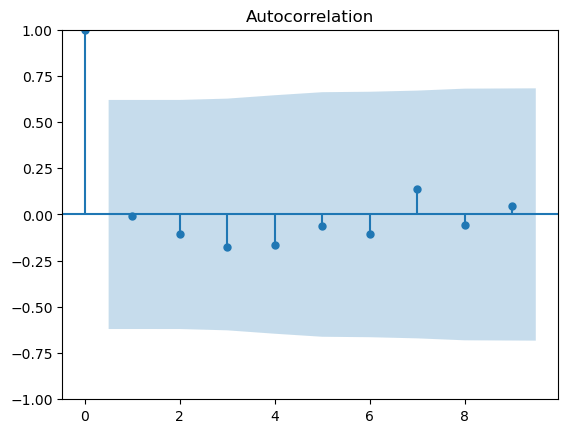

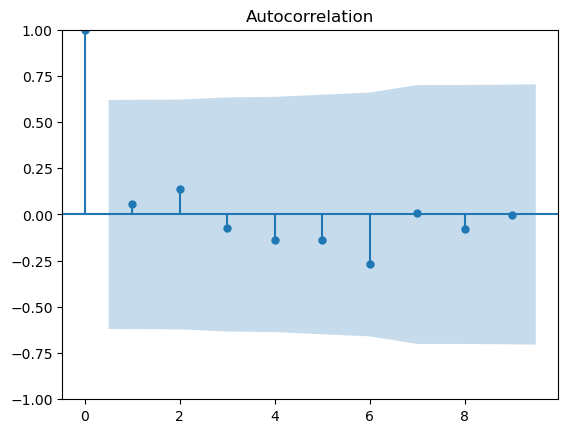

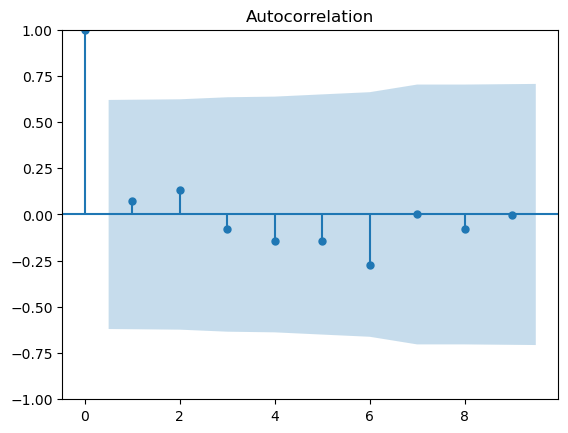

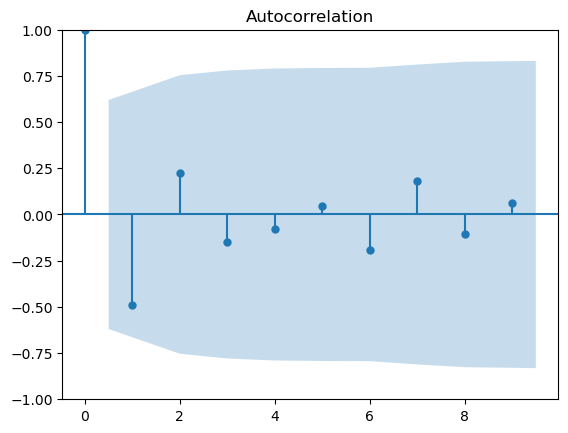

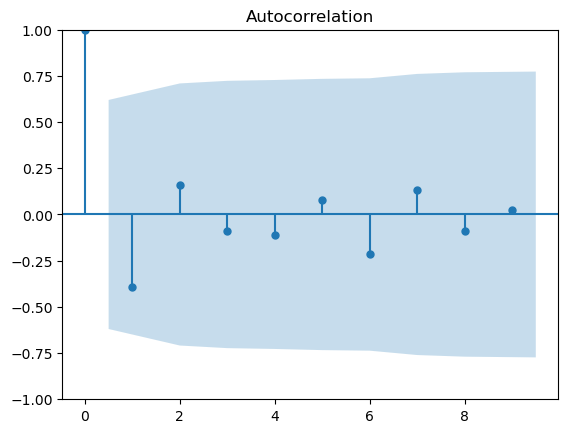

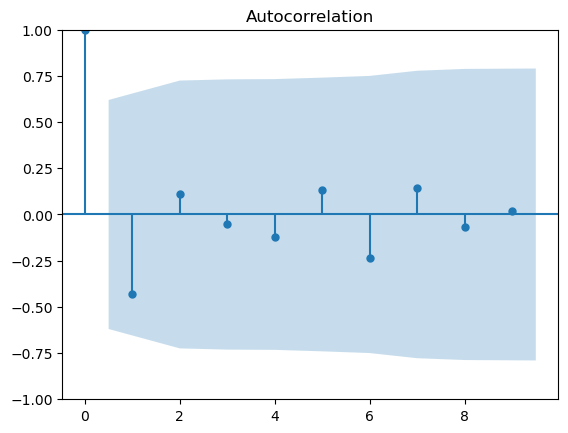

In [886]:
# Autocorrelation of Forecast Errors to Assess Accuracy

plot_acf(merged_AAPL_MA["forecast"] - merged_AAPL_MA["return"], lags=9)
plt.show()

plot_acf(merged_AAPL_AR["forecast"]- merged_AAPL_MA["return"], lags=9)
plt.show()

plot_acf(merged_AAPL_ARMA["forecast"]- merged_AAPL_MA["return"], lags=9)
plt.show()

plot_acf(merged_AAPL_RT["forecast"]- merged_AAPL_MA["return"], lags=9)
plt.show()

plot_acf(merged_AAPL_RF["forecast"]- merged_AAPL_MA["return"], lags=9)
plt.show()

plot_acf(merged_AAPL_gbm["forecast"]- merged_AAPL_MA["return"], lags=9)
plt.show()

In [887]:
# ACF doesnt make much sense for only 10 datapoints

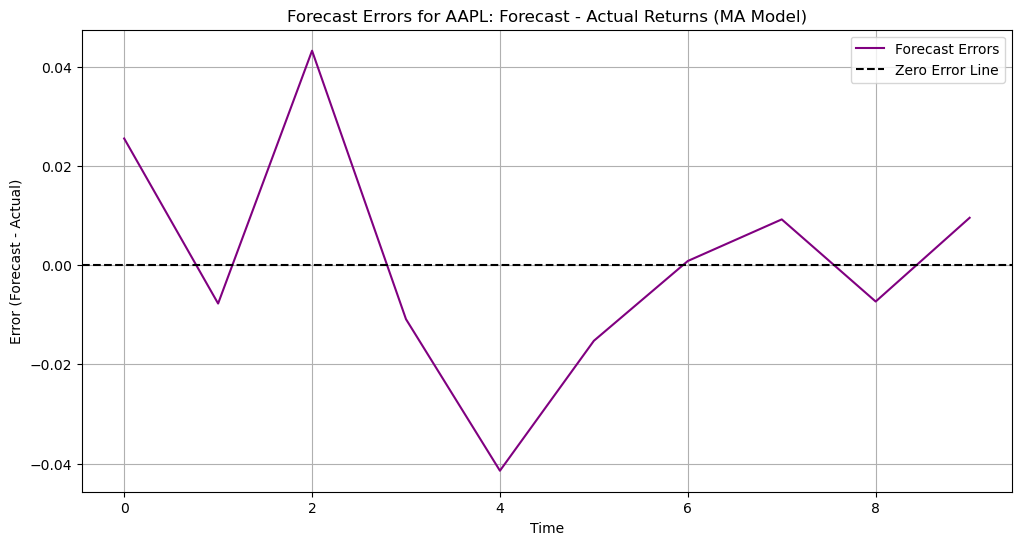

In [888]:
# AAPL :forecast erros from MA forecast


# Calculate the difference between forecasted and actual returns
forecast_errors = merged_AAPL_MA["forecast"] - merged_AAPL_MA["return"]

plt.figure(figsize=(12, 6))
plt.plot(forecast_errors, label='Forecast Errors', color='purple')
plt.axhline(0, color='black', linestyle='--', label='Zero Error Line')
plt.title('Forecast Errors for AAPL: Forecast - Actual Returns (MA Model)')
plt.xlabel('Time')
plt.ylabel('Error (Forecast - Actual)')
plt.legend()
plt.grid()
plt.show()

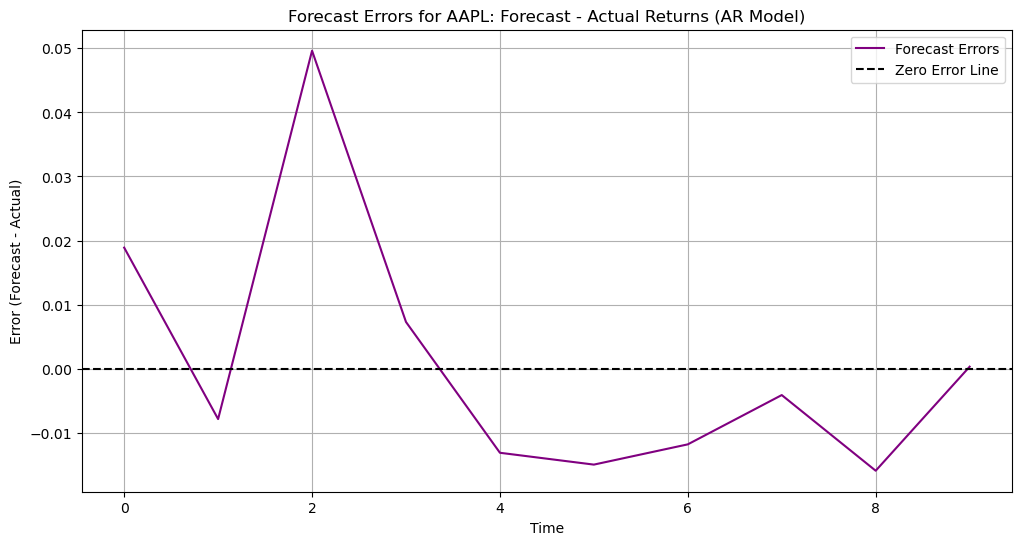

In [889]:
# AAPL :forecast erros from AR forecast

forecast_errors = merged_AAPL_AR["forecast"] - merged_AAPL_AR["return"]

plt.figure(figsize=(12, 6))
plt.plot(forecast_errors, label='Forecast Errors', color='purple')
plt.axhline(0, color='black', linestyle='--', label='Zero Error Line')
plt.title('Forecast Errors for AAPL: Forecast - Actual Returns (AR Model)')
plt.xlabel('Time')
plt.ylabel('Error (Forecast - Actual)')
plt.legend()
plt.grid()
plt.show()

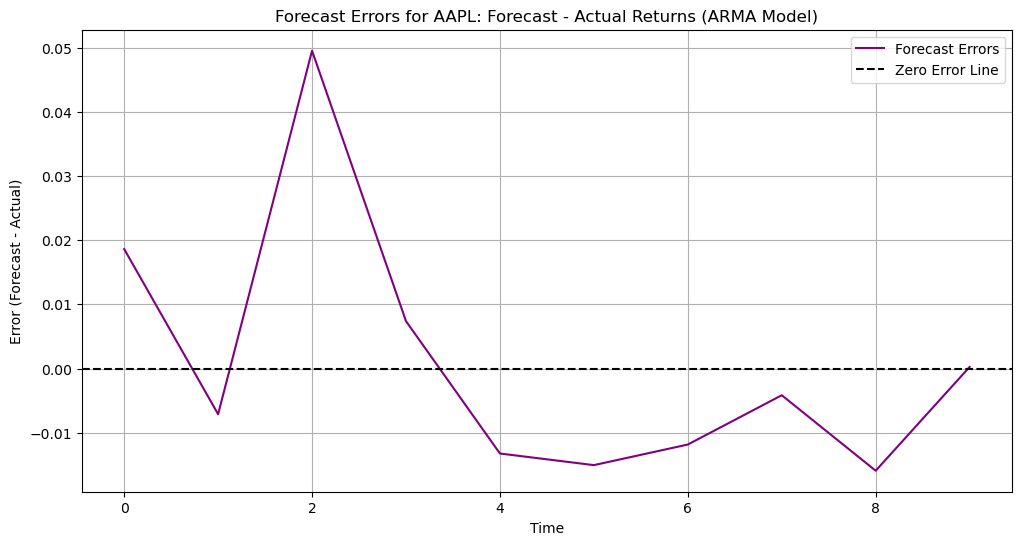

In [890]:

# Calculate the difference between forecasted and actual returns using the ARMA model
forecast_errors = merged_AAPL_ARMA["forecast"] - merged_AAPL_ARMA["return"]

plt.figure(figsize=(12, 6))
plt.plot(forecast_errors, label='Forecast Errors', color='purple')
plt.axhline(0, color='black', linestyle='--', label='Zero Error Line')
plt.title('Forecast Errors for AAPL: Forecast - Actual Returns (ARMA Model)')
plt.xlabel('Time')
plt.ylabel('Error (Forecast - Actual)')
plt.legend()
plt.grid()
plt.show()

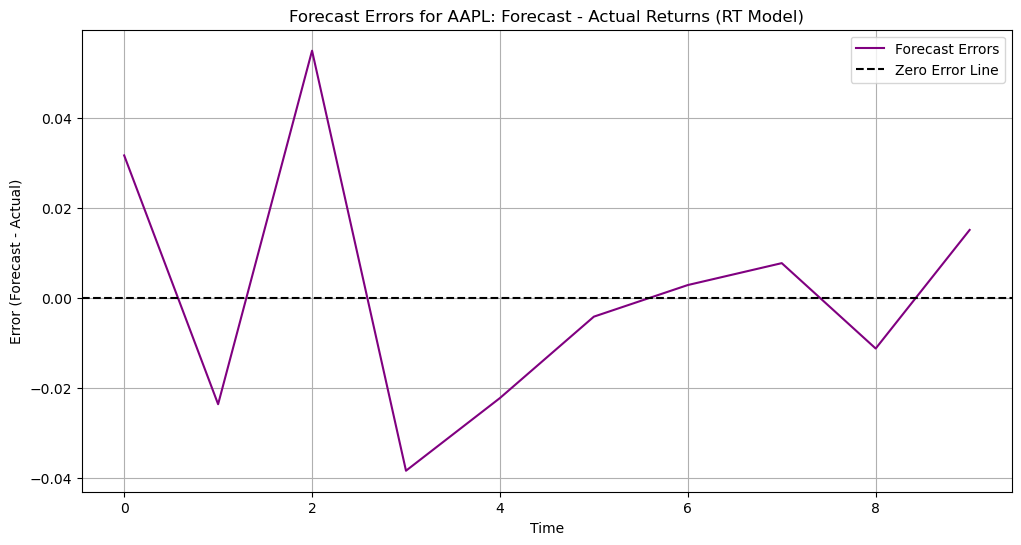

In [891]:
# Calculate the difference between forecasted and actual returns using the RT model
forecast_errors = merged_AAPL_RT["forecast"] - merged_AAPL_RT["return"]

plt.figure(figsize=(12, 6))
plt.plot(forecast_errors, label='Forecast Errors', color='purple')
plt.axhline(0, color='black', linestyle='--', label='Zero Error Line')
plt.title('Forecast Errors for AAPL: Forecast - Actual Returns (RT Model)')
plt.xlabel('Time')
plt.ylabel('Error (Forecast - Actual)')
plt.legend()
plt.grid()
plt.show()

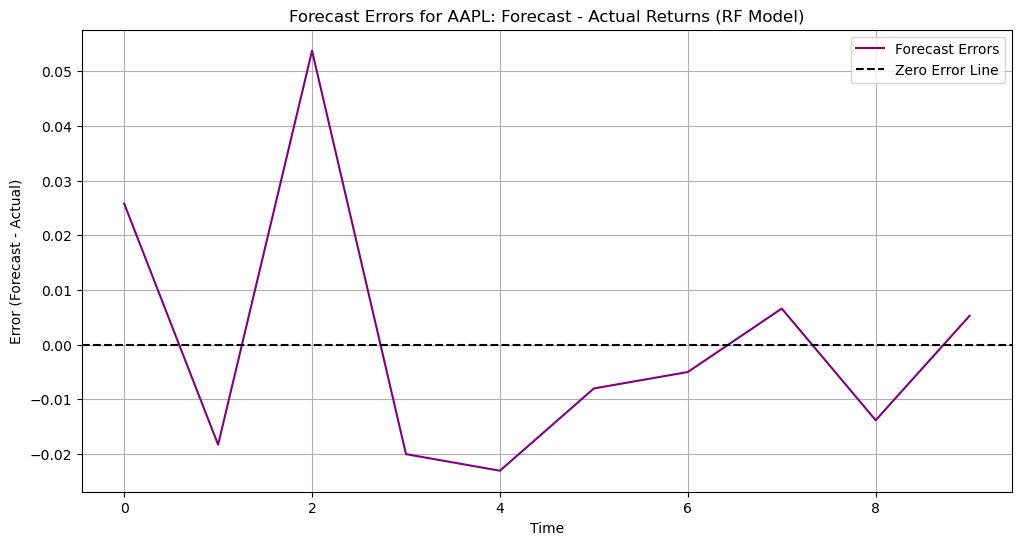

In [892]:
# Calculate the difference between forecasted and actual returns using the RF model
forecast_errors = merged_AAPL_RF["forecast"] - merged_AAPL_RF["return"]

plt.figure(figsize=(12, 6))
plt.plot(forecast_errors, label='Forecast Errors', color='purple')
plt.axhline(0, color='black', linestyle='--', label='Zero Error Line')
plt.title('Forecast Errors for AAPL: Forecast - Actual Returns (RF Model)')
plt.xlabel('Time')
plt.ylabel('Error (Forecast - Actual)')
plt.legend()
plt.grid()
plt.show()

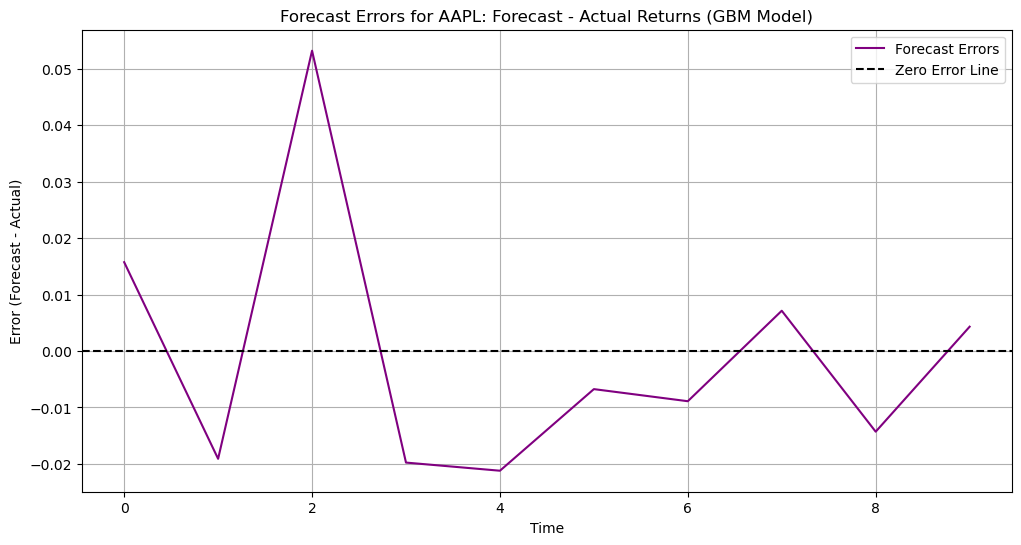

In [893]:
# Calculate the difference between forecasted and actual returns using the GBM model
forecast_errors = merged_AAPL_gbm["forecast"] - merged_AAPL_gbm["return"]

plt.figure(figsize=(12, 6))
plt.plot(forecast_errors, label='Forecast Errors', color='purple')
plt.axhline(0, color='black', linestyle='--', label='Zero Error Line')
plt.title('Forecast Errors for AAPL: Forecast - Actual Returns (GBM Model)')
plt.xlabel('Time')
plt.ylabel('Error (Forecast - Actual)')
plt.legend()
plt.grid()
plt.show()

In [894]:
## Lev End

In [895]:
## Harsh Begin

In [896]:
# Load the dataset
data = pd.read_excel("amazon_stock_data_2018-2019.xlsx")

# Clean column names by stripping whitespace
data.columns = data.columns.str.strip()

# Convert 'Date' to datetime format and set it as index with frequency
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data.set_index('Date', inplace=True)
data = data.asfreq('B')  # Set frequency to business days

# Calculate the daily returns
data['Return'] = data['Price Close'].pct_change().fillna(0)  # Fill NaN values

# Drop any rows with NaN values
data.dropna(inplace=True)

# 1. Stationarity Test using ADF (Augmented Dickey-Fuller Test)
adf_result = adfuller(data['Return'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

if adf_result[1] > 0.05:
    print("Return series is non-stationary, differencing the series.")
    data['Return'] = data['Return'].diff().dropna()

# Split Data into Training (2018) and Test (First 14 days of 2019)
train_data = data.loc['2018']
test_data = data.loc['2019-01-01':'2019-01-14']

# Use lagged returns as features for ML models (shift the return column by 1 to avoid future leakage)
train_data.loc[:, 'Lagged_Return'] = train_data['Return'].shift(1)
test_data.loc[:, 'Lagged_Return'] = test_data['Return'].shift(1)

# Drop rows with NaN after shifting
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

# Features (X) and Target (y)
X_train = train_data[['Lagged_Return']]
y_train = train_data['Return']

X_test = test_data[['Lagged_Return']]
y_test = test_data['Return']

# Model 1: Moving Average (MA) Model for Returns
window = 5  # Set window for moving average
train_data['MA'] = train_data['Return'].rolling(window=window).mean()
ma_forecast = [train_data['MA'].iloc[-1]] * len(test_data)  # Repeat last MA value

# Model 2: ARIMA Model with Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)
best_order = None
best_mse = float('inf')

# Cross-validation to find the best ARIMA order
for p in range(1, 3):
    for d in range(0, 2):
        for q in range(0, 2):
            try:
                cv_mse = []
                for train_idx, test_idx in tscv.split(X_train):
                    arima_model_cv = ARIMA(y_train.iloc[train_idx], order=(p, d, q))
                    arima_model_cv_fit = arima_model_cv.fit()
                    predictions = arima_model_cv_fit.forecast(steps=len(test_idx))
                    mse = mean_squared_error(y_train.iloc[test_idx], predictions)
                    cv_mse.append(mse)
                avg_mse = np.mean(cv_mse)
                if avg_mse < best_mse:
                    best_mse = avg_mse
                    best_order = (p, d, q)
            except:
                continue

print(f"Best ARIMA Order: {best_order}")

# Fit ARIMA model with the best order found by cross-validation
arima_model = ARIMA(train_data['Return'], order=best_order)
arima_model_fit = arima_model.fit()
arima_forecast = arima_model_fit.forecast(steps=len(test_data))

# Model 3: Exponential Smoothing (ETS)
ets_model = ExponentialSmoothing(train_data['Return'], trend='add', seasonal=None)
ets_model_fit = ets_model.fit()
ets_forecast = ets_model_fit.forecast(steps=len(test_data))

# Model 4: Decision Tree Regressor with Cross-Validation
tree_model = DecisionTreeRegressor(random_state=42)
cv_mae = []
for train_idx, test_idx in tscv.split(X_train):
    tree_model.fit(X_train.iloc[train_idx], y_train.iloc[train_idx])
    predictions = tree_model.predict(X_train.iloc[test_idx])
    mae = mean_absolute_error(y_train.iloc[test_idx], predictions)
    cv_mae.append(mae)

print(f"Decision Tree Cross-Validation MAE: {np.mean(cv_mae)}")
tree_model.fit(X_train, y_train)
tree_forecast = tree_model.predict(X_test)

# Model 5: Random Forest Regressor with Cross-Validation
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
cv_mae_forest = []
for train_idx, test_idx in tscv.split(X_train):
    forest_model.fit(X_train.iloc[train_idx], y_train.iloc[train_idx])
    predictions_forest = forest_model.predict(X_train.iloc[test_idx])
    mae_forest = mean_absolute_error(y_train.iloc[test_idx], predictions_forest)
    cv_mae_forest.append(mae_forest)

print(f"Random Forest Cross-Validation MAE: {np.mean(cv_mae_forest)}")
forest_model.fit(X_train, y_train)
forest_forecast = forest_model.predict(X_test)

# Evaluate the models for the test period (First 14 days of 2019)
actual_returns = test_data['Return']

# Align forecasts with actual returns
ma_forecast = ma_forecast[:len(actual_returns)]
arima_forecast = arima_forecast[:len(actual_returns)]
ets_forecast = ets_forecast[:len(actual_returns)]
tree_forecast = tree_forecast[:len(actual_returns)]
forest_forecast = forest_forecast[:len(actual_returns)]

# Calculate evaluation metrics
def calculate_metrics(actual, forecast):
    mae = mean_absolute_error(actual, forecast)
    mse = mean_squared_error(actual, forecast)
    mape = mean_absolute_percentage_error(actual, forecast) * 100
    return mae, mse, mape

metrics = {
    "Moving Average": calculate_metrics(actual_returns, ma_forecast),
    "ARIMA": calculate_metrics(actual_returns, arima_forecast),
    "ETS": calculate_metrics(actual_returns, ets_forecast),
    "Decision Tree": calculate_metrics(actual_returns, tree_forecast),
    "Random Forest": calculate_metrics(actual_returns, forest_forecast),
}

print("\nEvaluation Metrics:")
for model, (mae, mse, mape) in metrics.items():
    print(f"{model} - MAE: {mae}, MSE: {mse}, MAPE: {mape:.2f}%") 

# Function to calculate RMSE
def calculate_rmse(actual, forecast):
    return np.sqrt(mean_squared_error(actual, forecast))

# Calculate RMSE values for each model
rmse_values = {
    "Moving Average": calculate_rmse(actual_returns, ma_forecast),
    "ARIMA": calculate_rmse(actual_returns, arima_forecast),
    "ETS": calculate_rmse(actual_returns, ets_forecast),
    "Decision Tree": calculate_rmse(actual_returns, tree_forecast),
    "Random Forest": calculate_rmse(actual_returns, forest_forecast),
}

# Print RMSE values for all models
print("\nRMSE Values for Different Models:")
for model, rmse in rmse_values.items():
    print(f"{model}: RMSE = {rmse:.4f}")




ADF Statistic: -23.07397932877281
p-value: 0.0
Best ARIMA Order: (2, 0, 1)
Decision Tree Cross-Validation MAE: 0.02455626307762338
Random Forest Cross-Validation MAE: 0.020193744359335936

Evaluation Metrics:
Moving Average - MAE: 0.02374403873052623, MSE: 0.0007086410091939908, MAPE: 353.11%
ARIMA - MAE: 0.01911605349173993, MSE: 0.000594617550369954, MAPE: 100.25%
ETS - MAE: 0.019551100064990428, MSE: 0.0006668359218660691, MAPE: 117.83%
Decision Tree - MAE: 0.023742820792299002, MSE: 0.0014273694013697865, MAPE: 140.71%
Random Forest - MAE: 0.01517934839687435, MSE: 0.0006053720270188546, MAPE: 109.15%

RMSE Values for Different Models:
Moving Average: RMSE = 0.0266
ARIMA: RMSE = 0.0244
ETS: RMSE = 0.0258
Decision Tree: RMSE = 0.0378
Random Forest: RMSE = 0.0246


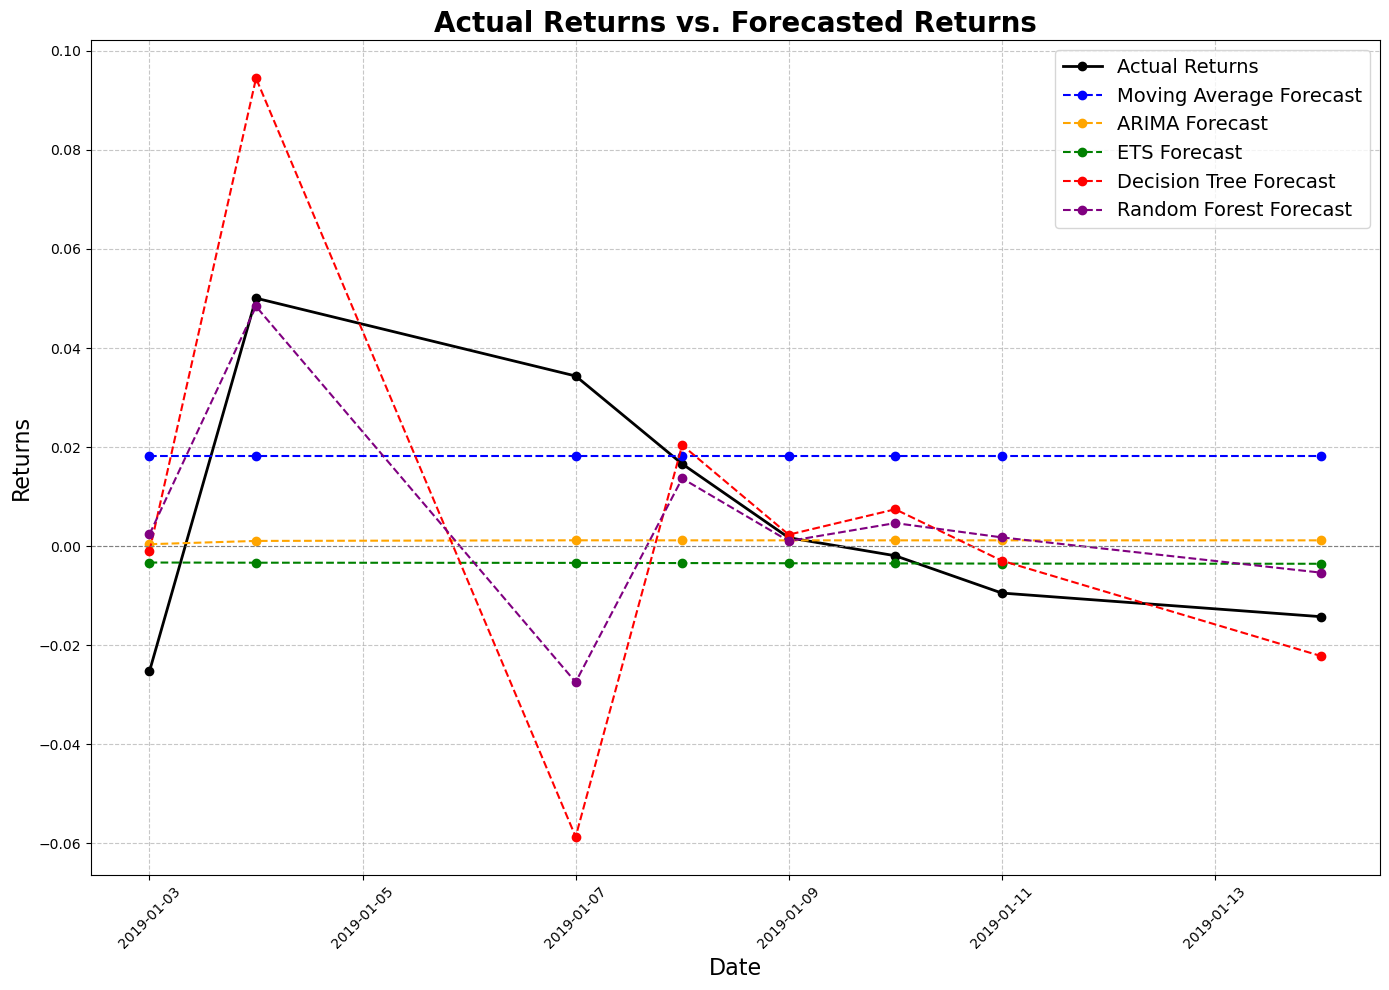

In [897]:
##Visual Inspection

# Visualize the actual returns and forecasts
plt.figure(figsize=(14, 10))

# Plot actual returns
plt.plot(test_data.index, actual_returns, label='Actual Returns', color='black', linewidth=2, marker='o')

# Plot forecasts from each model with enhanced styles
plt.plot(test_data.index, ma_forecast, label='Moving Average Forecast', color='blue', linestyle='--', marker='o')
plt.plot(test_data.index, arima_forecast, label='ARIMA Forecast', color='orange', linestyle='--', marker='o')
plt.plot(test_data.index, ets_forecast, label='ETS Forecast', color='green', linestyle='--', marker='o')
plt.plot(test_data.index, tree_forecast, label='Decision Tree Forecast', color='red', linestyle='--', marker='o')
plt.plot(test_data.index, forest_forecast, label='Random Forest Forecast', color='purple', linestyle='--', marker='o')

# Formatting the plot
plt.title('Actual Returns vs. Forecasted Returns', fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Returns', fontsize=16)
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')
plt.legend(fontsize=14, loc='upper right')  # Move legend to top right
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout() 

# Show plot
plt.show() 



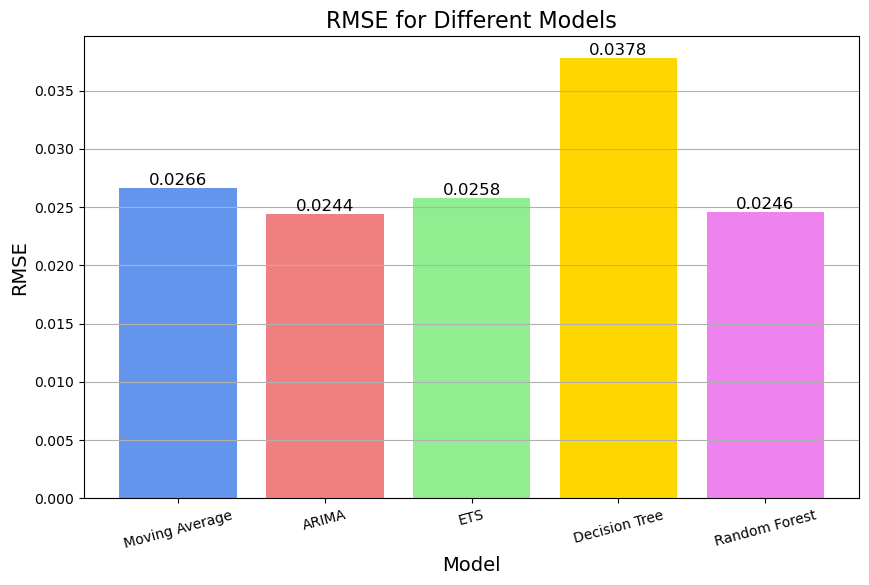

In [898]:
##RMSE Visualization

# Create a list of colors for the bars
colors = ['cornflowerblue', 'lightcoral', 'lightgreen', 'gold', 'violet']

# Create a DataFrame for RMSE values
rmse_df = pd.DataFrame(list(rmse_values.items()), columns=['Model', 'RMSE'])

# Visualize RMSE values
plt.figure(figsize=(10, 6))
bars = plt.bar(rmse_df['Model'], rmse_df['RMSE'], color=colors)
plt.title('RMSE for Different Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(rotation=15)
plt.grid(axis='y')

# Add RMSE values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', 
             ha='center', va='bottom', fontsize=12)

plt.tight_layout 


# Show the plot
plt.show() 


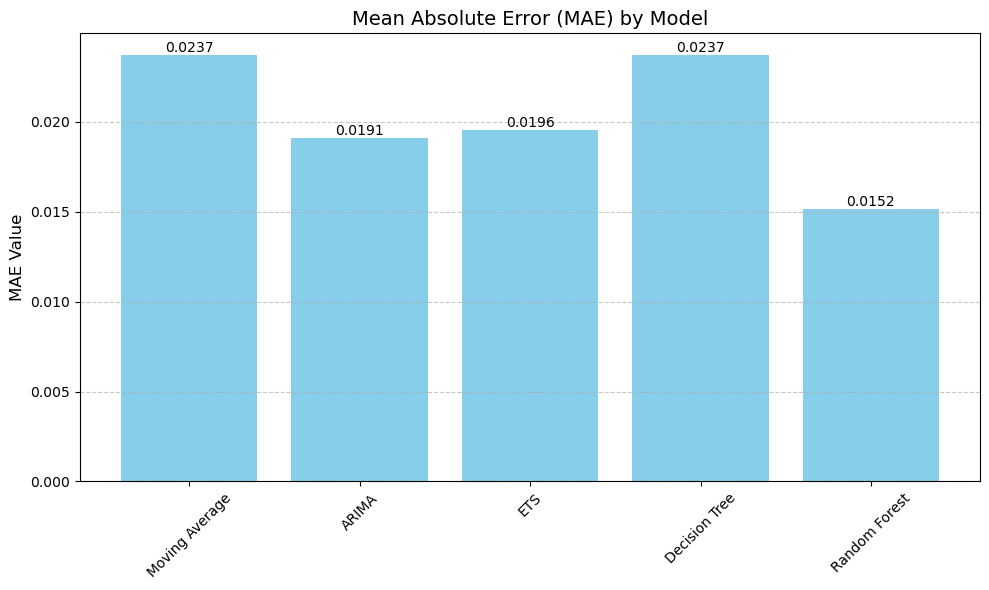

In [899]:
##MAE Visualization

# Create a DataFrame for MAE visualization
mae_df = pd.DataFrame({
    'Model': list(metrics.keys()),
    'MAE': [metrics[model][0] for model in metrics.keys()]
})

# Set the index to the Model names for easy plotting
mae_df.set_index('Model', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(mae_df.index, mae_df['MAE'], color='skyblue')

# Adding data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom', fontsize=10)

plt.title('Mean Absolute Error (MAE) by Model', fontsize=14)
plt.ylabel('MAE Value', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7) 

# Show the plot
plt.tight_layout()
plt.show()


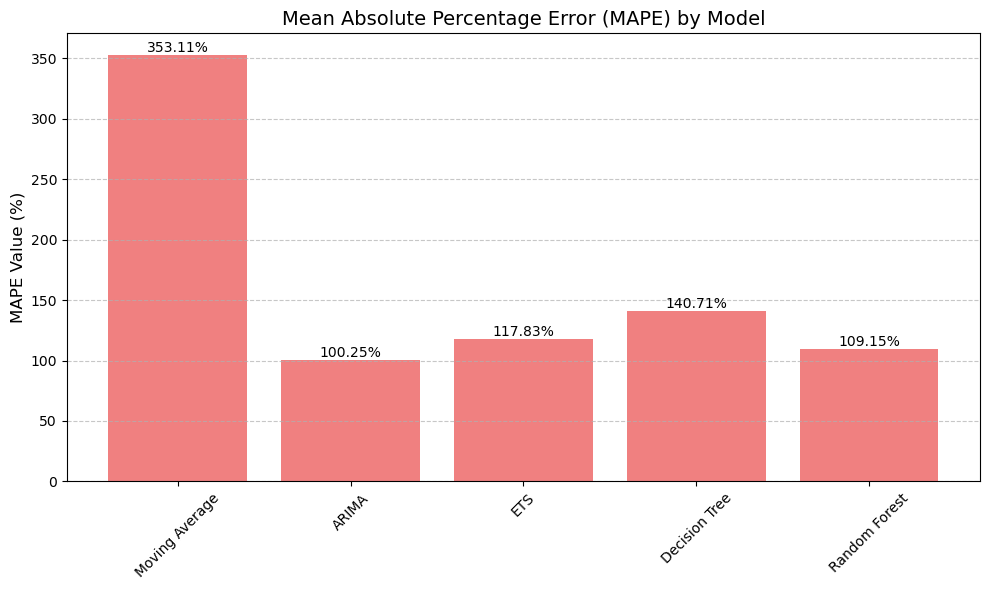

In [900]:
##MAPE Visualization

# Create a DataFrame for MAPE visualization
mape_df = pd.DataFrame({
    'Model': list(metrics.keys()),
    'MAPE': [metrics[model][2] for model in metrics.keys()]
})

# Set the index to the Model names for easy plotting
mape_df.set_index('Model', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(mape_df.index, mape_df['MAPE'], color='lightcoral')

# Adding data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}%", ha='center', va='bottom', fontsize=10)

plt.title('Mean Absolute Percentage Error (MAPE) by Model', fontsize=14)
plt.ylabel('MAPE Value (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7) 

# Show the plot
plt.tight_layout()
plt.show()

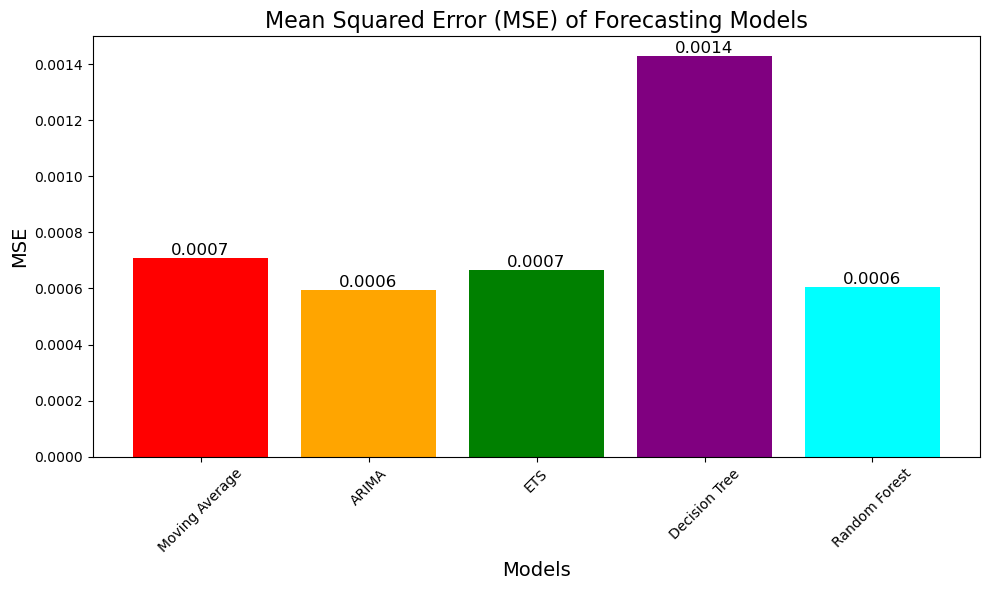

In [901]:
##MSE Visualization

# Calculate MSE for all models
mse_values = {
    "Moving Average": metrics["Moving Average"][1],
    "ARIMA": metrics["ARIMA"][1],
    "ETS": metrics["ETS"][1],
    "Decision Tree": metrics["Decision Tree"][1],
    "Random Forest": metrics["Random Forest"][1],
}

# Create a bar chart for MSE
plt.figure(figsize=(10, 6))

# Define colors
colors = ['red', 'orange', 'green', 'purple', 'cyan']

bars = plt.bar(mse_values.keys(), mse_values.values(), color=colors)

# Adding labels and title
plt.title('Mean Squared Error (MSE) of Forecasting Models', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('MSE', fontsize=14)

# Adding the MSE value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', 
             ha='center', va='bottom', fontsize=12) 

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()
 


In [902]:
##Conclusion

#the Random Forest model emerges as the most effective approach for forecasting Amazon's daily stock returns during the specified period.

In [903]:
## Harsh End

In [904]:
## soham start

In [905]:
# Loading the CSV file
file_path = 'Nvidia_2019.csv'
nvidia_stock_data = pd.read_csv(file_path)
nvidia_stock_data['date'] = pd.to_datetime(nvidia_stock_data['date'], format='%d-%m-%Y')

# Set 'date' as the index of the dataframe
nvidia_stock_data.set_index('date', inplace=True)

# Display the first few rows, checking for missing values
print(nvidia_stock_data.head())
missing_values = nvidia_stock_data.isna().sum()
print("Missing Values:\n", missing_values)
data_shape = nvidia_stock_data.shape
print("Shape of the DataFrame:", data_shape)


             gvkey  iid   tic         conm    cshtrd   prccd   prchd  \
date                                                                   
2019-01-02  117768    1  NVDA  NVIDIA CORP  12481290  136.22  138.48   
2019-01-03  117768    1  NVDA  NVIDIA CORP  17355050  127.99  135.16   
2019-01-04  117768    1  NVDA  NVIDIA CORP  14620450  136.19  137.73   
2019-01-07  117768    1  NVDA  NVIDIA CORP  17624380  143.40  144.89   
2019-01-08  117768    1  NVDA  NVIDIA CORP  19571460  139.83  146.78   

               prcld   prcod  
date                          
2019-01-02  130.0500  130.64  
2019-01-03  127.6932  133.79  
2019-01-04  129.7000  130.94  
2019-01-07  136.4300  138.50  
2019-01-08  136.9000  146.69  
Missing Values:
 gvkey     0
iid       0
tic       0
conm      0
cshtrd    0
prccd     0
prchd     0
prcld     0
prcod     0
dtype: int64
Shape of the DataFrame: (252, 9)


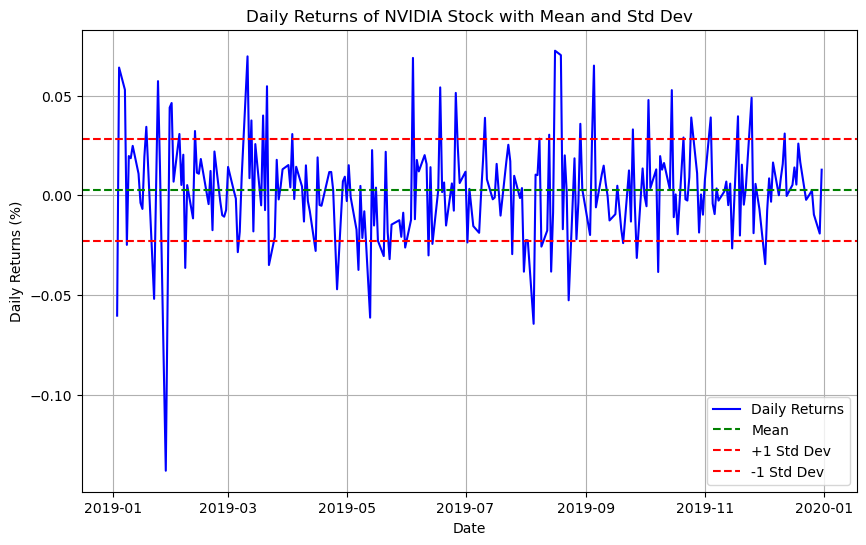

In [906]:
# Calculating daily returns using the percentage change in closing prices (prccd)
nvidia_stock_data['returns'] = nvidia_stock_data['prccd'].pct_change()
nvidia_stock_data.dropna(subset=['returns'], inplace=True)

# Calculating mean and standard deviation of returns
mean_returns = nvidia_stock_data['returns'].mean()
std_returns = nvidia_stock_data['returns'].std()

# Plotting the time series of the daily returns
plt.figure(figsize=(10, 6))
plt.plot(nvidia_stock_data.index, nvidia_stock_data['returns'], label='Daily Returns', color='blue')
plt.axhline(y=mean_returns, color='green', linestyle='--', label='Mean')
plt.axhline(y=mean_returns + std_returns, color='red', linestyle='--', label='+1 Std Dev')
plt.axhline(y=mean_returns - std_returns, color='red', linestyle='--', label='-1 Std Dev')
plt.title('Daily Returns of NVIDIA Stock with Mean and Std Dev')
plt.xlabel('Date')
plt.ylabel('Daily Returns (%)')
plt.grid(True)
plt.legend()
plt.show()


In [907]:
# Performming the ADF test on the 'returns' column
result = adfuller(nvidia_stock_data['returns'].dropna())
adf_stats = {
    'ADF Statistic': result[0],
    'p-value': result[1],
    'Number of Lags Used': result[2],
    'Number of Observations Used': result[3],
    'Critical Value (1%)': result[4]['1%'],
    'Critical Value (5%)': result[4]['5%'],
    'Critical Value (10%)': result[4]['10%']
}
adf_stats_df = pd.DataFrame(adf_stats, index=[0])
print(adf_stats_df)


   ADF Statistic       p-value  Number of Lags Used  \
0     -16.019326  6.229695e-29                    0   

   Number of Observations Used  Critical Value (1%)  Critical Value (5%)  \
0                          250            -3.456781            -2.873172   

   Critical Value (10%)  
0             -2.572969  


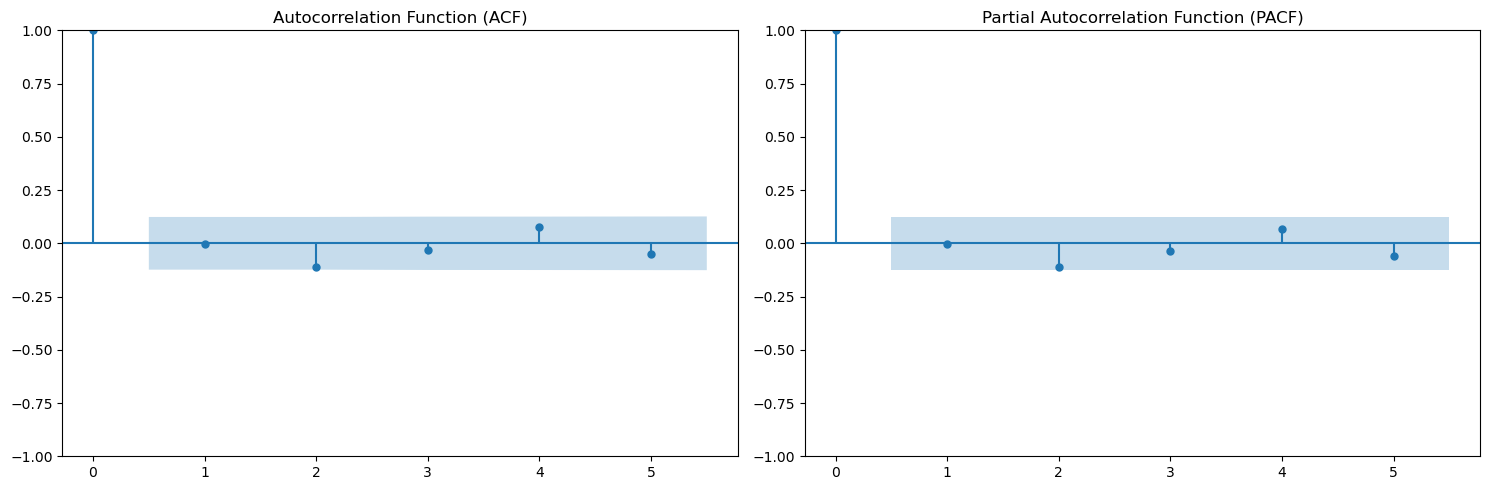

In [908]:
nvidia_stock_data.dropna(subset=['returns'], inplace=True)
returns = nvidia_stock_data['returns']

# Creating a figure with subplots for ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(returns, lags=5, ax=ax[0])
ax[0].set_title('Autocorrelation Function (ACF)')
plot_pacf(returns, lags=5, ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()


AR Model RMSE: 0.017666299027645466
MA Model RMSE: 0.01868117692172532
ARIMA Model RMSE: 0.018706220616115543
Random Forest Model RMSE: 0.02195772906874283
Regression Tree Model RMSE: 0.026204099070671796


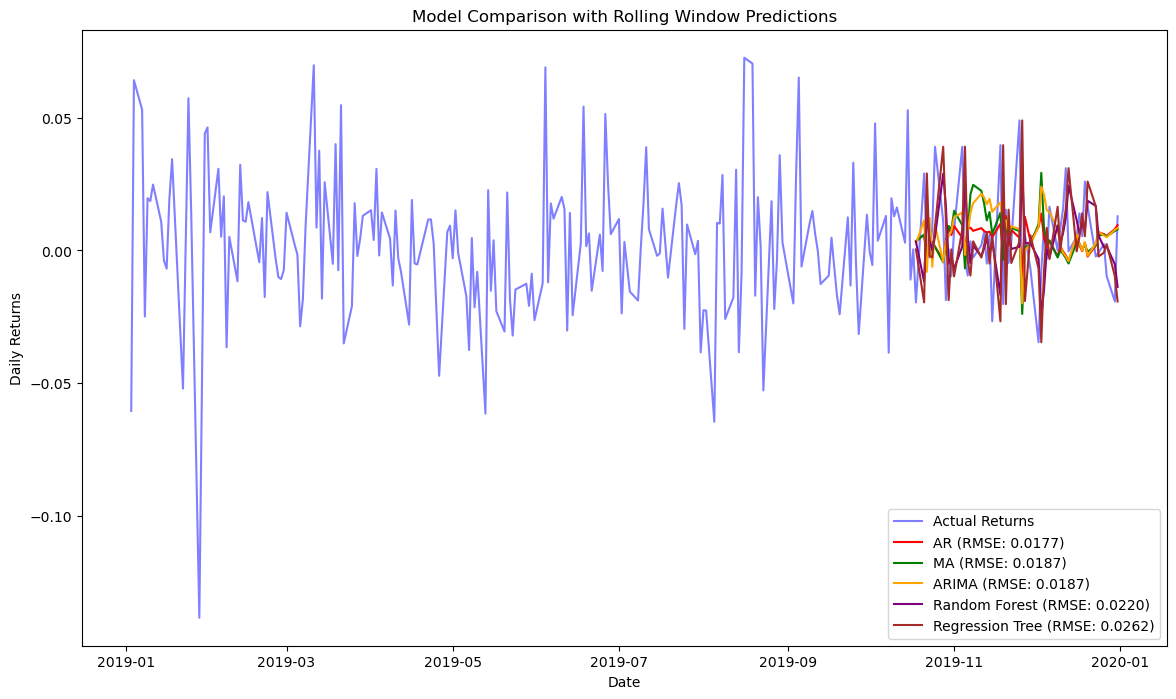

In [909]:
# Defining parameters for the rolling forecast
window_size = 30  # Rolling window size
train_size = int(len(returns) * 0.8)

predictions_ar = []
predictions_ma = []
predictions_arima = []
predictions_rf = []
predictions_tree = []

# Train and predict using a rolling window
for i in range(train_size, len(returns)):
    # Rolling window of data for training
    train = returns.iloc[i - window_size:i]
    
    if len(train) < window_size:  
        continue

    # AR (AutoRegressive) Model
    model_ar = AutoReg(train, lags=1)
    model_ar_fit = model_ar.fit()
    pred_ar = model_ar_fit.predict(start=len(train), end=len(train), dynamic=False)
    predictions_ar.append(pred_ar)

    # MA (Moving Average) Model 
    model_ma = ARIMA(train, order=(0, 0, 1))
    model_ma_fit = model_ma.fit()
    pred_ma = model_ma_fit.forecast(steps=1)
    predictions_ma.append(pred_ma)  # Append directly

    # ARIMA Model
    model_arima = ARIMA(train, order=(1, 0, 1))  # AR(1), I(0), MA(1)
    model_arima_fit = model_arima.fit()
    pred_arima = model_arima_fit.forecast(steps=1)
    predictions_arima.append(pred_arima)  # Append directly

    # Random Forest Model
    model_rf = RandomForestRegressor(n_estimators=100)
    model_rf.fit(np.arange(len(train)).reshape(-1, 1), train)
    pred_rf = model_rf.predict(np.array([[len(train)]]))[0]
    predictions_rf.append(pred_rf)

    # Regression Tree Model
    model_tree = DecisionTreeRegressor()
    model_tree.fit(np.arange(len(train)).reshape(-1, 1), train)
    pred_tree = model_tree.predict(np.array([[len(train)]]))[0]
    predictions_tree.append(pred_tree)

# Convert predictions to pandas Series
index_test = returns.index[train_size:len(returns)]
actual_values = returns.iloc[train_size:].values

predictions_ar = pd.Series(predictions_ar, index=index_test)
predictions_ma = pd.Series(predictions_ma, index=index_test)
predictions_arima = pd.Series(predictions_arima, index=index_test)
predictions_rf = pd.Series(predictions_rf, index=index_test)
predictions_tree = pd.Series(predictions_tree, index=index_test)

# Calculate RMSE for each model
rmse_ar = np.sqrt(mean_squared_error(actual_values, predictions_ar))
rmse_ma = np.sqrt(mean_squared_error(actual_values, predictions_ma))
rmse_arima = np.sqrt(mean_squared_error(actual_values, predictions_arima))
rmse_rf = np.sqrt(mean_squared_error(actual_values, predictions_rf))
rmse_tree = np.sqrt(mean_squared_error(actual_values, predictions_tree))

# Print RMSE for comparison
print(f'AR Model RMSE: {rmse_ar}')
print(f'MA Model RMSE: {rmse_ma}')
print(f'ARIMA Model RMSE: {rmse_arima}')
print(f'Random Forest Model RMSE: {rmse_rf}')
print(f'Regression Tree Model RMSE: {rmse_tree}')

# Plotting the actual vs predicted values for each model
plt.figure(figsize=(14, 8))
plt.plot(returns, label='Actual Returns', color='blue', alpha=0.5)
plt.plot(predictions_ar, label=f'AR (RMSE: {rmse_ar:.4f})', color='red')
plt.plot(predictions_ma, label=f'MA (RMSE: {rmse_ma:.4f})', color='green')
plt.plot(predictions_arima, label=f'ARIMA (RMSE: {rmse_arima:.4f})', color='orange')
plt.plot(predictions_rf, label=f'Random Forest (RMSE: {rmse_rf:.4f})', color='purple')
plt.plot(predictions_tree, label=f'Regression Tree (RMSE: {rmse_tree:.4f})', color='brown')
plt.title('Model Comparison with Rolling Window Predictions')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()


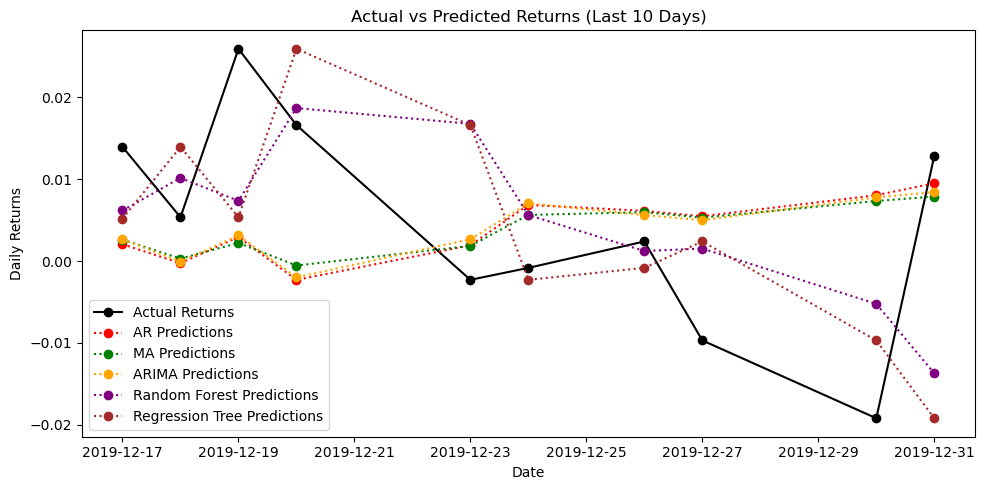

In [910]:
# Visualizing the last 10 actual and predicted values
last_ten_dates = nvidia_stock_data.index[-10:]
actual_values_last_ten = nvidia_stock_data['returns'].iloc[-10:]
predictions_ar_last_ten = predictions_ar[last_ten_dates]
predictions_ma_last_ten = predictions_ma[last_ten_dates]
predictions_arima_last_ten = predictions_arima[last_ten_dates]
predictions_rf_last_ten = predictions_rf[last_ten_dates]
predictions_tree_last_ten = predictions_tree[last_ten_dates]

plt.figure(figsize=(10, 5))
plt.plot(last_ten_dates, actual_values_last_ten, label='Actual Returns', color='black', marker='o', linestyle='-')
plt.plot(last_ten_dates, predictions_ar_last_ten, label='AR Predictions', color='red', marker='o', linestyle=':')
plt.plot(last_ten_dates, predictions_ma_last_ten, label='MA Predictions', color='green', marker='o', linestyle=':')
plt.plot(last_ten_dates, predictions_arima_last_ten, label='ARIMA Predictions', color='orange', marker='o', linestyle=':')
plt.plot(last_ten_dates, predictions_rf_last_ten, label='Random Forest Predictions', color='purple', marker='o', linestyle=':')
plt.plot(last_ten_dates, predictions_tree_last_ten, label='Regression Tree Predictions', color='brown', marker='o', linestyle=':')
plt.title('Actual vs Predicted Returns (Last 10 Days)')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.tight_layout()
plt.show()


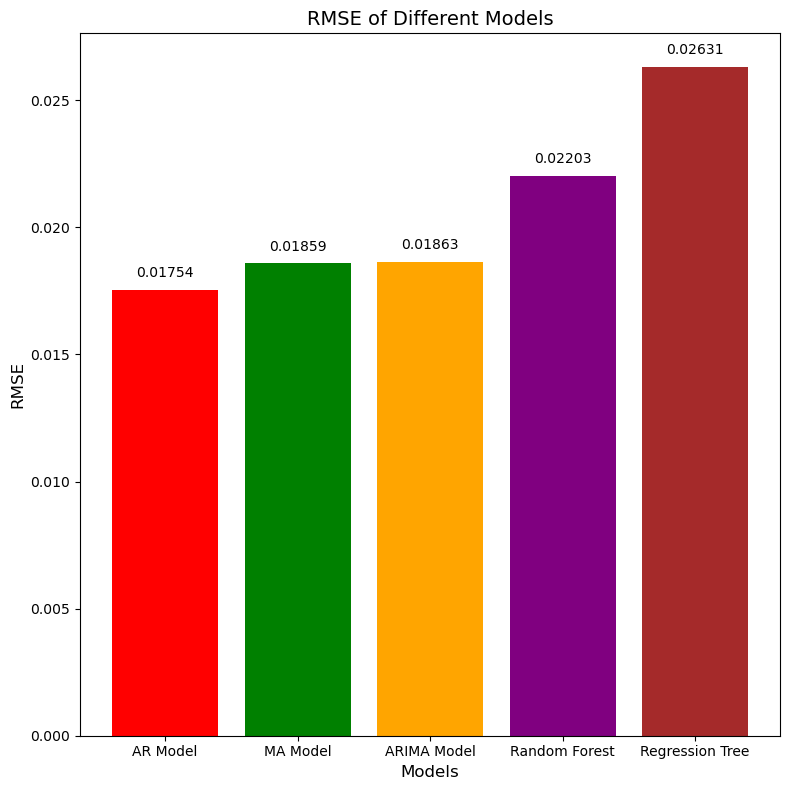

In [911]:
# Plotting RMSE Values for all models
models = ['AR Model', 'MA Model', 'ARIMA Model', 'Random Forest', 'Regression Tree']
rmse_values = [0.017540653273757274, 0.018585159123632067, 0.018630267212382652, 
               0.022027409659572554, 0.02631371567799931]
plt.figure(figsize=(8, 8))
plt.bar(models, rmse_values, color=['red', 'green', 'orange', 'purple', 'brown'])
plt.title('RMSE of Different Models', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
for i, value in enumerate(rmse_values):
    plt.text(i, value + 0.0005, f'{value:.5f}', ha='center')
plt.tight_layout()
plt.show()


In [912]:
# Performing DM Tets
def dm_test(e1, e2, h=1, crit='MSE'):
    """
    Diebold-Mariano test to compare the forecast accuracy of two models.
    
    Parameters:
    - e1, e2: Residuals (forecast errors) of the two models being compared.
    - h: Forecast horizon (1 for one-step ahead).
    - crit: Criterion for the loss function ('MSE' for mean squared error).
    
    Returns:
    - DM statistic and p-value.
    """
    # Ensure inputs are numpy arrays
    e1 = np.asarray(e1, dtype=float)  # Ensure float type
    e2 = np.asarray(e2, dtype=float)  # Ensure float type
    
    d = e1**2 - e2**2
    loss_diff = d[~np.isnan(d)]  # Remove NaN values
    
    if len(loss_diff) == 0:
        raise ValueError("Loss difference array is empty after removing NaNs.")
    
    mean_d = np.mean(loss_diff)

    # Autocorrelation of loss differential
    acf_vals = acf(loss_diff, fft=False, nlags=h-1)

    # Variance of the loss differential
    gamma_0 = np.var(loss_diff, ddof=1)
    gamma_h = np.sum(acf_vals[1:] * gamma_0)

    variance_d = gamma_0 + 2 * gamma_h
    dm_stat = mean_d / np.sqrt(variance_d / len(e1))
    
    # Compute p-value using a t-distribution
    df = len(e1) - 1
    p_value = 2 * (1 - t.cdf(np.abs(dm_stat), df))
    
    return dm_stat, p_value


residuals_ar = actual_values - predictions_ar.values
residuals_rf = actual_values - predictions_rf.values
# Converting to numpy arrays and ensuring they are float type
residuals_ar = np.asarray(residuals_ar, dtype=float)
residuals_rf = np.asarray(residuals_rf, dtype=float)

# Performing DM test for AR Model vs Random Forest Model
dm_stat_ar_rf, p_value_ar_rf = dm_test(residuals_ar, residuals_rf)
print("DM Statistic (AR vs RF):", dm_stat_ar_rf)
print("P-Value (AR vs RF):", p_value_ar_rf)


DM Statistic (AR vs RF): -2.071798277952423
P-Value (AR vs RF): 0.04346241488431146


In [913]:
# Soham end

In [914]:
# Pratiksha Start

In [915]:
# Importing necessary libraries


# Loading the stock data
data = pd.read_csv("Johnson & Johnson.csv")  

# Converting 'Date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='mixed')
data.set_index('date', inplace=True)

print(data.head())
print(data.shape)

            gvkey  iid  tic               conm  prccd  prchd  prcld  prcod
date                                                                      
2010-04-01   6266    1  JNJ  JOHNSON & JOHNSON  64.68  64.99  64.41  64.71
2010-05-01   6266    1  JNJ  JOHNSON & JOHNSON  63.93  64.62  63.82  64.58
2010-06-01   6266    1  JNJ  JOHNSON & JOHNSON  64.45  64.54  63.83  63.90
2010-07-01   6266    1  JNJ  JOHNSON & JOHNSON  63.99  64.35  63.74  64.25
2010-08-01   6266    1  JNJ  JOHNSON & JOHNSON  64.21  64.26  63.63  63.92
(1510, 8)


In [916]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2010-04-01 to 2015-12-31
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gvkey   1510 non-null   int64  
 1   iid     1510 non-null   int64  
 2   tic     1510 non-null   object 
 3   conm    1510 non-null   object 
 4   prccd   1510 non-null   float64
 5   prchd   1510 non-null   float64
 6   prcld   1510 non-null   float64
 7   prcod   1510 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 106.2+ KB


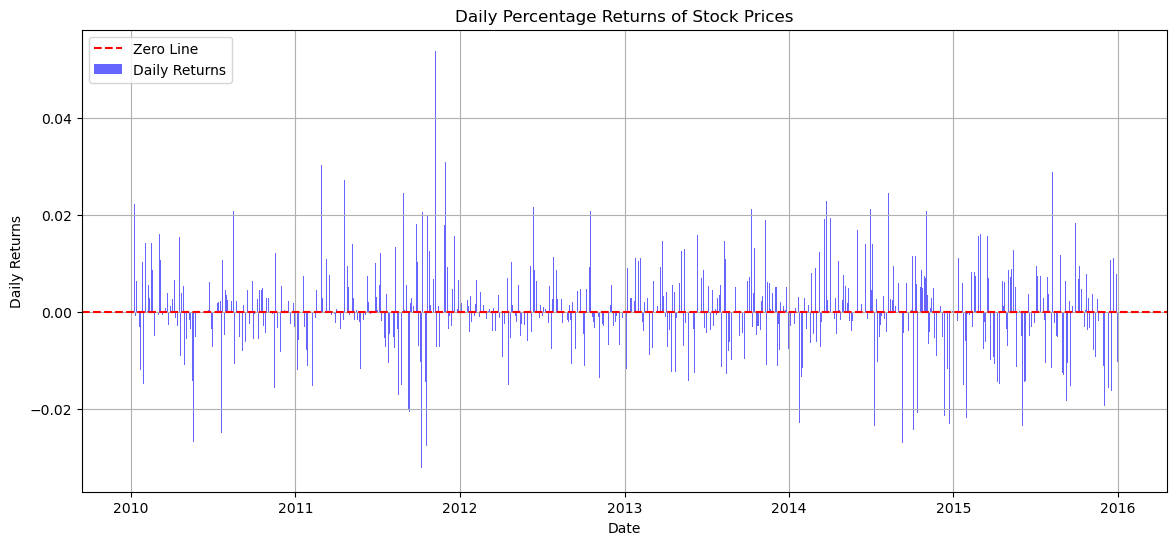

In [917]:
data['Daily_Returns'] = data['prccd'].pct_change()
data = data.dropna()

# Plot the daily returns
plt.figure(figsize=(14, 6))
plt.bar(data.index, data['Daily_Returns'], color='blue', alpha=0.6, label='Daily Returns')
plt.title('Daily Percentage Returns of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.axhline(0, color='red', linestyle='--', label='Zero Line') 
plt.legend()
plt.grid(True)
plt.show()

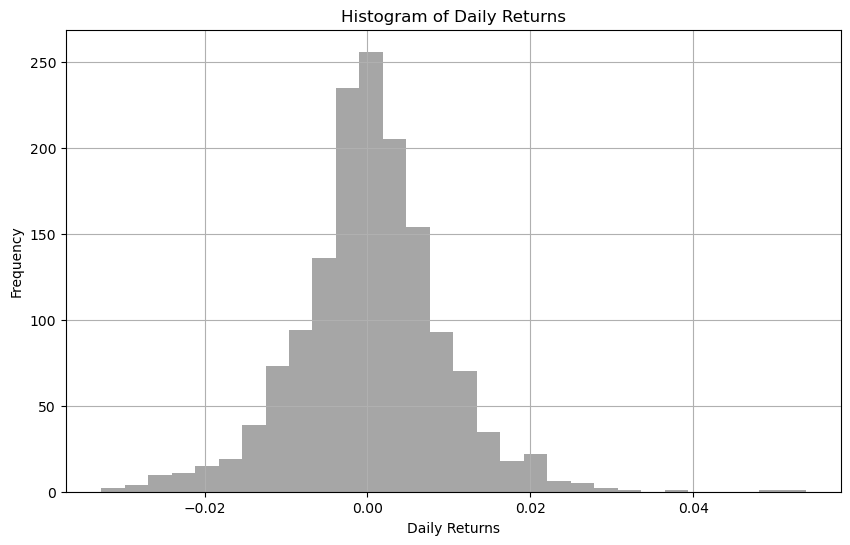

In [918]:
# Histogram of daily returns
data['Daily_Returns'] = data['prccd'].pct_change()
data = data.dropna()
plt.figure(figsize=(10, 6))
plt.hist(data['Daily_Returns'], bins=30, color='gray', alpha=0.7)
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [919]:
# ADF test on daily returns
result = adfuller(data['Daily_Returns'].dropna()) 
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)
print("Critical Values:")
for key, value in critical_values.items():
    print(f"   {key}: {value}")

# Interpretation
if p_value < 0.05:
    print("The series is stationary (reject the null hypothesis).")
else:
    print("The series is not stationary (fail to reject the null hypothesis).")

    

ADF Statistic: -40.34342486247943
p-value: 0.0
Critical Values:
   1%: -3.434696697851678
   5%: -2.8634597924260303
   10%: -2.567792072971565
The series is stationary (reject the null hypothesis).


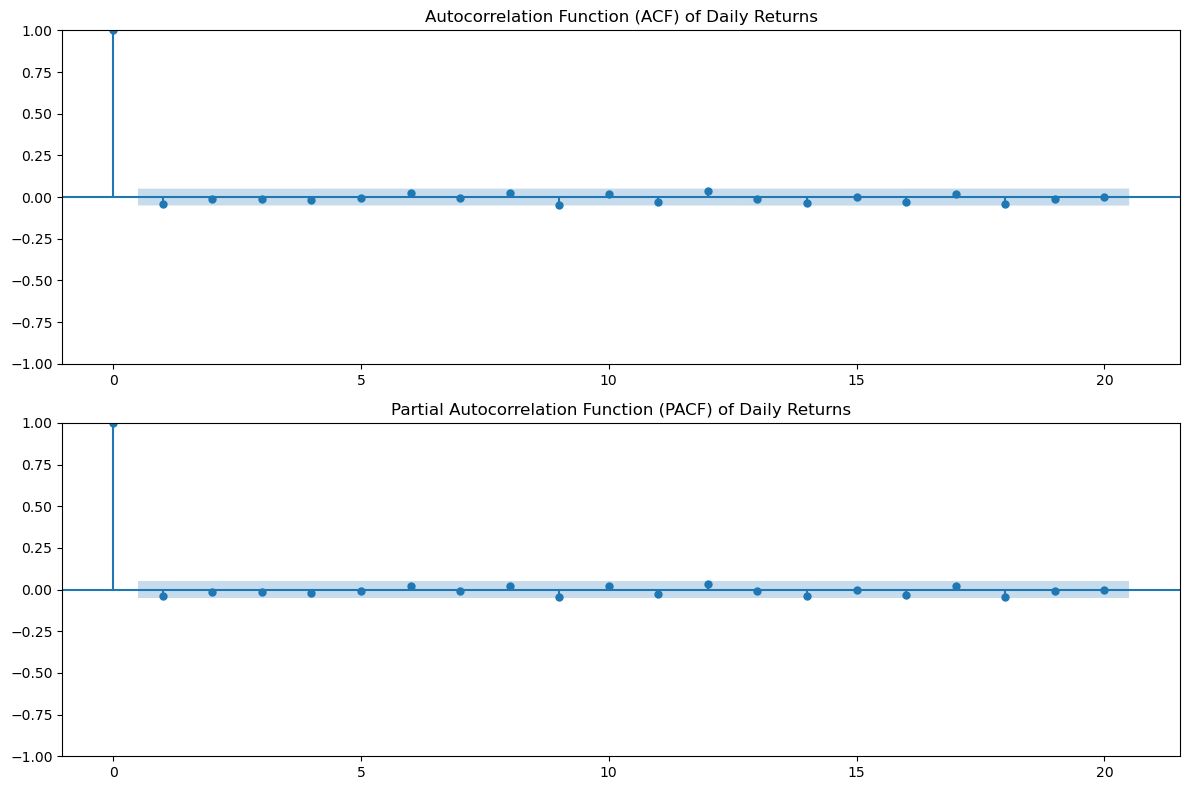

In [920]:
data['Daily_Returns'] = data['prccd'].pct_change()
data = data.dropna()
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF
plot_acf(data['Daily_Returns'].dropna(), ax=ax[0], lags=20)
ax[0].set_title('Autocorrelation Function (ACF) of Daily Returns')

# Plot PACF
plot_pacf(data['Daily_Returns'].dropna(), ax=ax[1], lags=20)
ax[1].set_title('Partial Autocorrelation Function (PACF) of Daily Returns')

plt.tight_layout()
plt.show()


In [921]:
returns = data['Daily_Returns']

# Defining parameters for the rolling forecast
window_size = 30 
train_size = int(len(returns) * 0.8)

predictions_ar = []
predictions_ma = []
predictions_arima = []

# Train and predict using a rolling window
for i in range(train_size, len(returns)):
    # Rolling window of data for training
    train = returns.iloc[i - window_size:i]
    
    if len(train) < window_size:  
        continue

    # AR (AutoRegressive) Model
    model_ar = AutoReg(train, lags=1)
    model_ar_fit = model_ar.fit()
    pred_ar = model_ar_fit.predict(start=len(train), end=len(train), dynamic=False)
    predictions_ar.append(pred_ar)

    # MA (Moving Average) Model 
    model_ma = ARIMA(train, order=(0, 0, 1))
    model_ma_fit = model_ma.fit()
    pred_ma = model_ma_fit.forecast(steps=1)
    predictions_ma.append(pred_ma)

    # ARIMA Model
    model_arima = ARIMA(train, order=(1, 0, 1))  # AR(1), I(0), MA(1)
    model_arima_fit = model_arima.fit()
    pred_arima = model_arima_fit.forecast(steps=1)
    predictions_arima.append(pred_arima)

# Convert predictions to pandas Series
index_test = returns.index[train_size:len(returns)]
actual_values = returns.iloc[train_size:].values

predictions_ar = pd.Series(predictions_ar, index=index_test)
predictions_ma = pd.Series(predictions_ma, index=index_test)
predictions_arima = pd.Series(predictions_arima, index=index_test)

# Calculate RMSE for each model
rmse_ar = np.sqrt(mean_squared_error(actual_values, predictions_ar))
rmse_ma = np.sqrt(mean_squared_error(actual_values, predictions_ma))
rmse_arima = np.sqrt(mean_squared_error(actual_values, predictions_arima))

print(f'AR Model RMSE: {rmse_ar}')
print(f'MA Model RMSE: {rmse_ma}')
print(f'ARIMA Model RMSE: {rmse_arima}')

AR Model RMSE: 0.010678659998640856
MA Model RMSE: 0.010801815060462384
ARIMA Model RMSE: 0.010865262818347769


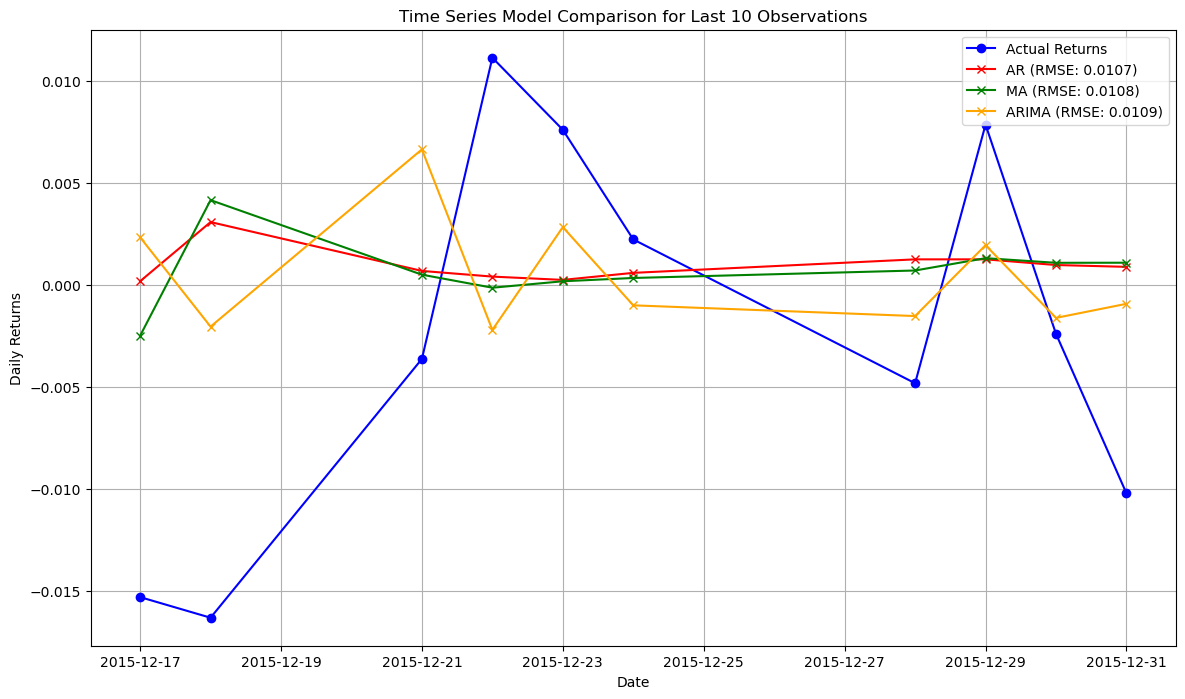

In [922]:
# Plotting the actual vs predicted values for each model for the last 10 observations
plt.figure(figsize=(14, 8))

# Get the last 10 observations
last_10_actual = returns.iloc[-10:]
last_10_ar = predictions_ar.iloc[-10:]
last_10_ma = predictions_ma.iloc[-10:]
last_10_arima = predictions_arima.iloc[-10:]

plt.plot(last_10_actual.index, last_10_actual, label='Actual Returns', color='blue', marker='o')
plt.plot(last_10_ar.index, last_10_ar, label=f'AR (RMSE: {rmse_ar:.4f})', color='red', marker='x')
plt.plot(last_10_ma.index, last_10_ma, label=f'MA (RMSE: {rmse_ma:.4f})', color='green', marker='x')
plt.plot(last_10_arima.index, last_10_arima, label=f'ARIMA (RMSE: {rmse_arima:.4f})', color='orange', marker='x')

plt.title('Time Series Model Comparison for Last 10 Observations')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.grid(True)
plt.show()

Random Forest RMSE: 0.012767365540585308
Regression Tree RMSE: 0.014916642950831166


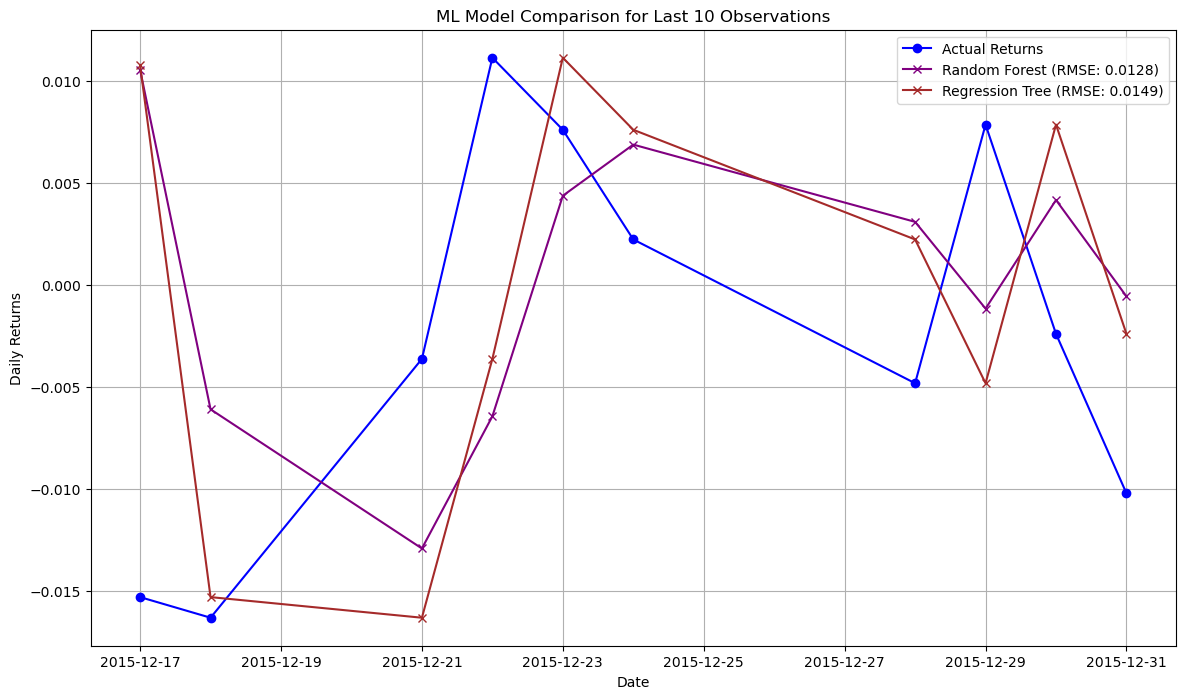

In [923]:
# Assuming 'data' contains the daily returns
returns = data['Daily_Returns']

# Defining parameters for the rolling forecast
window_size = 30 
train_size = int(len(returns) * 0.8)

predictions_rf = []
predictions_tree = []

# Train and predict using a rolling window for ML models
for i in range(train_size, len(returns)):
    # Rolling window of data for training
    train = returns.iloc[i - window_size:i].values.reshape(-1, 1)
    X_train = np.arange(len(train)).reshape(-1, 1)  
    y_train = train.flatten()  

    if len(train) < window_size:  
        continue

    # Random Forest Model
    model_rf = RandomForestRegressor(n_estimators=100)
    model_rf.fit(X_train, y_train)
    pred_rf = model_rf.predict(np.array([[len(train)]]))[0]
    predictions_rf.append(pred_rf)

    # Regression Tree Model
    model_tree = DecisionTreeRegressor()
    model_tree.fit(X_train, y_train)
    pred_tree = model_tree.predict(np.array([[len(train)]]))[0]
    predictions_tree.append(pred_tree)

# Convert predictions to pandas Series
index_test = returns.index[train_size:len(returns)]
predictions_rf = pd.Series(predictions_rf, index=index_test)
predictions_tree = pd.Series(predictions_tree, index=index_test)

# Get actual values for RMSE calculation
actual_values = returns.iloc[train_size:].values

# Calculate RMSE for each ML model
rmse_rf = np.sqrt(mean_squared_error(actual_values, predictions_rf))
rmse_tree = np.sqrt(mean_squared_error(actual_values, predictions_tree))

print(f'Random Forest RMSE: {rmse_rf}')
print(f'Regression Tree RMSE: {rmse_tree}')

# Plotting the actual vs predicted values for ML models for the last 10 observations
plt.figure(figsize=(14, 8))
last_10_actual = returns.iloc[-10:]
last_10_rf = predictions_rf.iloc[-10:]
last_10_tree = predictions_tree.iloc[-10:]

plt.plot(last_10_actual.index, last_10_actual, label='Actual Returns', color='blue', marker='o')
plt.plot(last_10_rf.index, last_10_rf, label=f'Random Forest (RMSE: {rmse_rf:.4f})', color='purple', marker='x')
plt.plot(last_10_tree.index, last_10_tree, label=f'Regression Tree (RMSE: {rmse_tree:.4f})', color='brown', marker='x')

plt.title('ML Model Comparison for Last 10 Observations')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.grid(True)
plt.show()

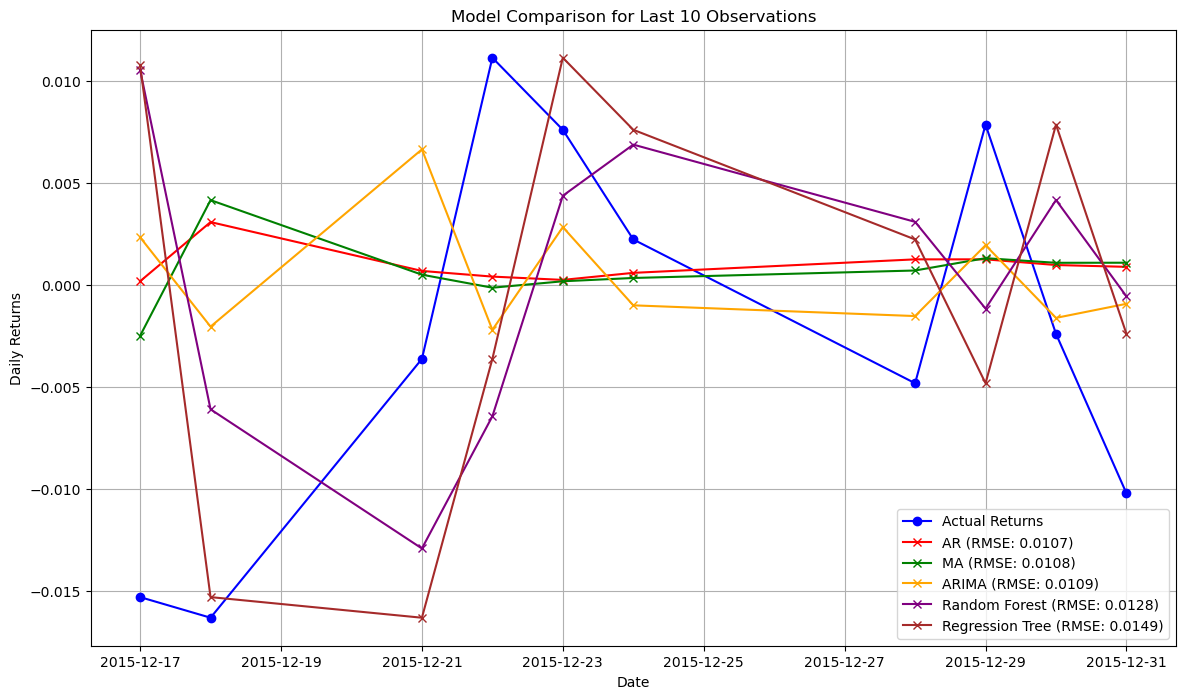

In [924]:
# Plotting the actual vs predicted values for both time series and ML models for the last 10 observations
plt.figure(figsize=(14, 8))

last_10_actual = returns.iloc[-10:]
last_10_ar = predictions_ar.iloc[-10:]
last_10_ma = predictions_ma.iloc[-10:]
last_10_arima = predictions_arima.iloc[-10:]
last_10_rf = predictions_rf.iloc[-10:]
last_10_tree = predictions_tree.iloc[-10:]

plt.plot(last_10_actual.index, last_10_actual, label='Actual Returns', color='blue', marker='o')
plt.plot(last_10_ar.index, last_10_ar, label=f'AR (RMSE: {rmse_ar:.4f})', color='red', marker='x')
plt.plot(last_10_ma.index, last_10_ma, label=f'MA (RMSE: {rmse_ma:.4f})', color='green', marker='x')
plt.plot(last_10_arima.index, last_10_arima, label=f'ARIMA (RMSE: {rmse_arima:.4f})', color='orange', marker='x')
plt.plot(last_10_rf.index, last_10_rf, label=f'Random Forest (RMSE: {rmse_rf:.4f})', color='purple', marker='x')
plt.plot(last_10_tree.index, last_10_tree, label=f'Regression Tree (RMSE: {rmse_tree:.4f})', color='brown', marker='x')

plt.title('Model Comparison for Last 10 Observations')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.grid(True)
plt.show()


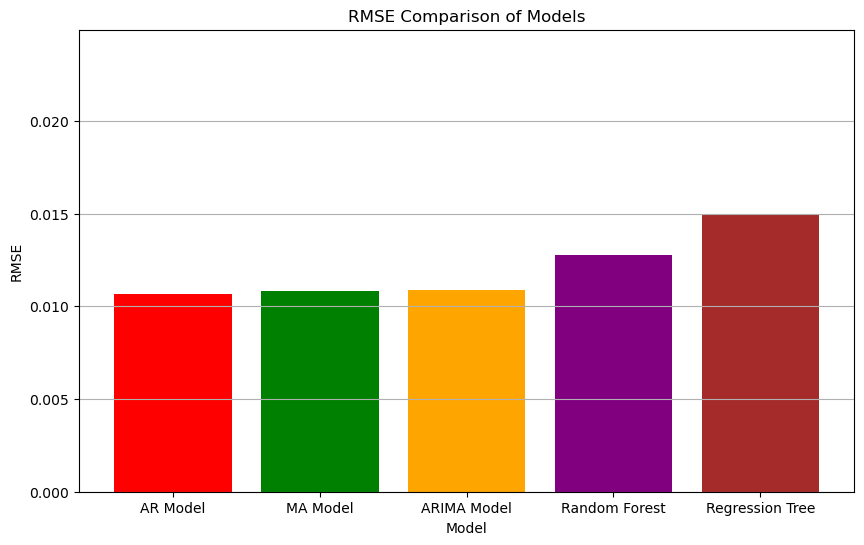

In [925]:
# RMSE values
rmse_values = {
    'AR Model': rmse_ar,
    'MA Model': rmse_ma,
    'ARIMA Model': rmse_arima,
    'Random Forest': rmse_rf,
    'Regression Tree': rmse_tree
}

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(rmse_values.keys(), rmse_values.values(), color=['red', 'green', 'orange', 'purple', 'brown'])
plt.title('RMSE Comparison of Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.ylim(0, max(rmse_values.values()) + 0.01)  # Set y-axis limit for better visibility
plt.grid(axis='y')

plt.show()
